### 데이터 전처리 

pandas - 2.0.3
numpy  - 1.23.5
scikit-learn - 1.5.1
imbalanced-learn - 0.12.3 
pytorch -  2.4.0+cu118
tensorflow - 2.10.0
CUDA - 11.8
cudnn - 8.7.0

In [14]:
import pandas as pd
import numpy as np

print(pd.__version__) # 2.0.3
print(np.__version__) # 1.23.5

2.0.3
1.23.5


In [15]:
import tensorflow as tf
print("TensorFlow version:", tf.__version__)

# GPU가 사용 가능한지 확인
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # 모든 GPU 메모리를 동적으로 할당하도록 설정
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print(f"GPUs {gpus} are available and memory growth is set.")
        
        # GPU 이름 출력
        for gpu in gpus:
            details = tf.config.experimental.get_device_details(gpu)
            print(f"GPU Name: {details['device_name']}")
    except RuntimeError as e:
        print(e)
else:
    print("No GPUs are available.")

TensorFlow version: 2.10.0
GPUs [PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')] are available and memory growth is set.
GPU Name: NVIDIA GeForce RTX 4070 SUPER


In [16]:
import torch

# PyTorch 버전 확인
print(f"PyTorch version: {torch.__version__}")

# CUDA 사용 가능 여부 확인
if torch.cuda.is_available():
    print(f"CUDA is available. PyTorch version: {torch.__version__}")
    print(f"CUDA version: {torch.version.cuda}")
    print(f"Number of GPUs: {torch.cuda.device_count()}")
    print(f"Current GPU: {torch.cuda.current_device()}")
    print(f"GPU Name: {torch.cuda.get_device_name(torch.cuda.current_device())}")
else:
    print("CUDA is not available.")

PyTorch version: 2.4.0+cu118
CUDA is available. PyTorch version: 2.4.0+cu118
CUDA version: 11.8
Number of GPUs: 1
Current GPU: 0
GPU Name: NVIDIA GeForce RTX 4070 SUPER


In [4]:
#앞서 매핑시킨 데이터 프레임 불러오기.
# 매핑시킨 데이터 노트북이 날라갔다..... 생략.....하 

import pandas as pd
df = pd.read_csv('./load_npy_img.csv', index_col=0)
df


,img_file,img_array,action,emotion,sex,position,age,category,label,processed_img_file
0,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,NaN,운전하다,중립,M,front,30대,졸음운전,0,processed_images2\SGA2100258S0000IMG0001.jpg.npy
1,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,NaN,꾸벅꾸벅졸다,중립,M,front,30대,졸음운전,1,processed_images2\SGA2100258S0000IMG0002.jpg.npy
2,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,NaN,꾸벅꾸벅졸다,중립,M,front,30대,졸음운전,1,processed_images2\SGA2100258S0000IMG0003.jpg.npy
3,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,NaN,꾸벅꾸벅졸다,중립,M,front,30대,졸음운전,1,processed_images2\SGA2100258S0000IMG0004.jpg.npy
4,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,NaN,운전하다,중립,M,front,30대,졸음운전,0,processed_images2\SGA2100258S0000IMG0005.jpg.npy
...,...,...,...,...,...,...,...,...,...,...
268246,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...,NaN,꾸벅꾸벅졸다,중립,M,front,30대,졸음운전,1,processed_images2\SGA2100567S0361IMG0001.jpg.npy
268247,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...,NaN,꾸벅꾸벅졸다,중립,M,front,30대,졸음운전,1,processed_images2\SGA2100567S0361IMG0002.jpg.npy
268248,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...,NaN,꾸벅꾸벅졸다,중립,M,front,30대,졸음운전,1,processed_images2\SGA2100567S0361IMG0003.jpg.npy
268249,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...,NaN,무언가를보다,중립,M,front,30대,졸음운전,0,processed_images2\SGA2100567S0361IMG0004.jpg.npy


In [5]:
df_target = df[['img_file', 'label']]
df_target['label'].value_counts()    # 166864 / 101387
df_target

,img_file,label
0,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,0
1,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,1
2,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,1
3,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,1
4,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,0
...,...,...
268246,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...,1
268247,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...,1
268248,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...,1
268249,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...,0


In [11]:
# # 전처리한 이미지 데이터로 특징벡터 추출하기 
# # 로컬에서 진행하기에 .. 아무래도 원본데이터에서 특징을 추출하기보다, npy 파일로 저장된 이미지 데이터를 불러와서 특징을 추출하는 것이 더 효율적일 것 같음
# # 전처리된 이미지 파일도 모두 날라갔음... 존재하지 않는 코드 취급 

# import tensorflow as tf
# from tensorflow.keras.applications import EfficientNetB0
# import numpy as np
# import pandas as pd
# import os
# import psutil
# from tqdm import tqdm  # tqdm 라이브러리 임포트

# # GPU 사용 여부 확인 및 메모리 성장 설정
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#         print("GPU 사용 가능 및 메모리 성장 설정 완료.")
#     except RuntimeError as e:
#         print(e)
# else:
#     print('GPU를 사용할 수 없습니다.')

# class FeatureExtractor:
#     def __init__(self, df, batch_size=2, model_name='efficientnetb0'):  # 배치 크기 더 줄이기
#         self.df = df.dropna(subset=['processed_img_file'])  # NaN 값 제거
#         self.df['processed_img_file'] = self.df['processed_img_file'].astype(str)  # 문자열로 변환
#         self.batch_size = batch_size
#         self.model = self.load_model(model_name)
    
#     def load_model(self, model_name):
#         if model_name == 'efficientnetb0':
#             base_model = EfficientNetB0(weights='imagenet', include_top=False, pooling='avg')
#         else:
#             raise ValueError("지원되지 않는 모델 이름입니다.")
#         return base_model

#     def extract_features(self, img_array):
#         features = self.model.predict(img_array, verbose=0)  # verbose=0으로 설정하여 진행 상황 메시지 비활성화
#         return features

#     def process_images(self, df_part):
#         img_paths = df_part['processed_img_file'].tolist()
        
#         features_list = []
#         for i in range(0, len(img_paths), self.batch_size):  # tqdm 사용 안함
#             batch_paths = img_paths[i:i + self.batch_size]
#             img_arrays = []
#             for img_path in batch_paths:
#                 try:
#                     img_array = np.load(img_path)
#                     img_arrays.append(img_array)
#                 except Exception as e:
#                     print(f"이미지 로드 실패: {img_path}, 오류: {e}")
#                     continue
#             if not img_arrays:
#                 continue
#             img_arrays = np.array(img_arrays, dtype=np.float32)
#             features = self.extract_features(img_arrays)
#             features_list.extend(features)
        
#         return features_list

# # 메모리 사용량 모니터링 함수
# def print_memory_usage():
#     process = psutil.Process(os.getpid())
#     print(f"메모리 사용량: {process.memory_info().rss / 1024 ** 2:.2f} MB")

# # GPU 메모리 사용량 모니터링 함수
# def print_gpu_memory_usage():
#     if gpus:
#         for gpu in gpus:
#             gpu_memory = tf.config.experimental.get_memory_info(gpu.name)
#             print(f"GPU 메모리 사용량: {gpu_memory['current'] / 1024 ** 2:.2f} MB")

# # 특징 추출 실행
# extractor = FeatureExtractor(df_sample, batch_size=2)  # 배치 크기 줄이기

# # 데이터프레임을 10등분하여 처리 (더 작은 단위로 나누기)
# num_parts = 10
# df_parts = np.array_split(df_sample, num_parts)

# # 임시 파일 저장 경로
# temp_dir = 'temp_features'
# os.makedirs(temp_dir, exist_ok=True)

# for idx, df_part in enumerate(tqdm(df_parts, desc="Processing parts", disable=True)):  # tqdm 사용 안함
#     print(f"파트 {idx + 1}/{num_parts} 처리 중")  # 디버깅
#     features = extractor.process_images(df_part)
#     if features:  # 빈 리스트가 아닌 경우에만 저장
#         features_df_part = pd.DataFrame(features)
#         temp_file_path = os.path.join(temp_dir, f'features_part_{idx}.csv')
#         features_df_part.to_csv(temp_file_path, index=False)
#     print_memory_usage()  # 메모리 사용량 출력
#     print_gpu_memory_usage()  # GPU 메모리 사용량 출력

# # 임시 파일에서 데이터 로드 및 결합
# feature_files = [os.path.join(temp_dir, f) for f in os.listdir(temp_dir) if f.endswith('.csv')]
# if feature_files:
#     all_features_df = pd.concat([pd.read_csv(f) for f in feature_files], ignore_index=True)
# else:
#     all_features_df = pd.DataFrame()

# # 임시 파일 삭제
# for f in feature_files:
#     os.remove(f)
# os.rmdir(temp_dir)

# # 특징 데이터프레임 확인
# print(all_features_df)

In [10]:
# 원본데이터로  , resize , nparray float32 , efficientnet preprocess 진행 

import tensorflow as tf
from tensorflow.keras.applications.efficientnet import EfficientNetB0, preprocess_input
import numpy as np
import pandas as pd
import os
import psutil
from tqdm import tqdm
from PIL import Image
from concurrent.futures import ThreadPoolExecutor
import time
import subprocess

# GPU 사용 여부 확인 및 메모리 성장 설정
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU 사용 가능 및 메모리 성장 설정 완료.")
    except RuntimeError as e:
        print(e)
else:
    print('GPU를 사용할 수 없습니다.')

class FeatureExtractor:
    def __init__(self, df, batch_size=32, model_name='efficientnetb0'):  # 배치 크기 늘리기
        self.df = df.dropna(subset=['img_file'])  # NaN 값 제거
        self.df['img_file'] = self.df['img_file'].astype(str)  # 문자열로 변환
        self.batch_size = batch_size
        self.model = self.load_model(model_name)
    
    def load_model(self, model_name):
        if model_name == 'efficientnetb0':
            base_model = EfficientNetB0(weights='imagenet', include_top=False, pooling='avg')
        else:
            raise ValueError("지원되지 않는 모델 이름입니다.")
        return base_model

    def extract_features(self, img_array):
        features = self.model.predict(img_array, verbose=0)  # verbose=0으로 설정하여 진행 상황 메시지 비활성화
        return features

    def preprocess_image(self, img_path):
        try:
            # 이미지 로드
            img = Image.open(img_path)
            # 이미지 리사이즈
            img = img.resize((224, 224))
            # EfficientNet 전처리
            img_array = np.array(img, dtype=np.float32)
            img_array = preprocess_input(img_array)  # EfficientNetB0의 전처리 함수 사용
            return img_array
        except Exception as e:
            print(f"이미지 전처리 실패: {img_path}, 오류: {e}")
            return None

    def process_images(self, df_part):
        img_paths = df_part['img_file'].tolist()
        
        features_list = []
        with ThreadPoolExecutor() as executor:
            img_arrays = list(executor.map(self.preprocess_image, img_paths))
        
        img_arrays = [img for img in img_arrays if img is not None]
        if not img_arrays:
            return features_list
        
        img_arrays = np.array(img_arrays, dtype=np.float32)
        for i in range(0, len(img_arrays), self.batch_size):
            batch_arrays = img_arrays[i:i + self.batch_size]
            features = self.extract_features(batch_arrays)
            features_list.extend(features)
        
        return features_list

# 메모리 사용량 모니터링 함수
def print_memory_usage():
    process = psutil.Process(os.getpid())
    print(f"메모리 사용량: {process.memory_info().rss / 1024 ** 2:.2f} MB")

# GPU 메모리 사용량 모니터링 함수 (nvidia-smi 사용)
def print_gpu_memory_usage():
    try:
        result = subprocess.run(['nvidia-smi', '--query-gpu=memory.used,memory.total', '--format=csv,nounits,noheader'], 
                                stdout=subprocess.PIPE, stderr=subprocess.PIPE, text=True)
        if result.returncode == 0:
            used, total = result.stdout.strip().split(',')
            print(f"GPU 메모리 사용량: {used} MiB / {total} MiB")
        else:
            print(f"nvidia-smi 오류: {result.stderr}")
    except FileNotFoundError:
        print("nvidia-smi 명령어를 찾을 수 없습니다. NVIDIA 드라이버가 설치되어 있는지 확인하세요.")

# 특징 추출 실행
df_sample = df_target  # 예제 데이터프레임 로드
extractor = FeatureExtractor(df_sample, batch_size=32)  # 배치 크기 늘리기

# 데이터프레임을 10등분하여 처리 (더 작은 단위로 나누기)
num_parts = 10
df_parts = np.array_split(df_sample, num_parts)

# 임시 파일 저장 경로
temp_dir = 'temp_features'
os.makedirs(temp_dir, exist_ok=True)

# tqdm을 사용하여 파트별 진행 상황 표시
part_times = []
for idx, df_part in enumerate(tqdm(df_parts, desc="Processing parts")):
    start_time = time.time()  # 파트 시작 시간 기록
    print(f"파트 {idx + 1}/{num_parts} 처리 중")  # 디버깅
    features = extractor.process_images(df_part)
    if features:  # 빈 리스트가 아닌 경우에만 저장
        features_df_part = pd.DataFrame(features)
        temp_file_path = os.path.join(temp_dir, f'features_part_{idx}.csv')
        features_df_part.to_csv(temp_file_path, index=False)
    end_time = time.time()  # 파트 종료 시간 기록
    elapsed_time = end_time - start_time  # 경과 시간 계산
    part_times.append(elapsed_time)
    
    # 평균 처리 시간 계산
    avg_time_per_part = np.mean(part_times)
    remaining_parts = num_parts - (idx + 1)
    estimated_remaining_time = avg_time_per_part * remaining_parts
    
    tqdm.write(f"파트 {idx + 1}/{num_parts} 처리 완료, 경과 시간: {elapsed_time:.2f} 초")
    tqdm.write(f"예상 남은 시간: {estimated_remaining_time:.2f} 초")
    
    print_memory_usage()  # 메모리 사용량 출력
    print_gpu_memory_usage()  # GPU 메모리 사용량 출력

# 임시 파일에서 데이터 로드 및 결합
feature_files = [os.path.join(temp_dir, f) for f in os.listdir(temp_dir) if f.endswith('.csv')]
if feature_files:
    raw_features_df = pd.concat([pd.read_csv(f) for f in feature_files], ignore_index=True)
else:
    raw_features_df = pd.DataFrame()

# 임시 파일 삭제
for f in feature_files:
    os.remove(f)
os.rmdir(temp_dir)

# 특징 데이터프레임 확인
raw_features_df

raw_features_df.to_csv("raw_feature.csv",index=False)

GPU 사용 가능 및 메모리 성장 설정 완료.


Processing parts:   0%|                                                                         | 0/10 [00:00<?, ?it/s]

파트 1/10 처리 중


Processing parts:  10%|██████▍                                                         | 1/10 [03:07<28:03, 187.07s/it]

파트 1/10 처리 완료, 경과 시간: 187.02 초
예상 남은 시간: 1683.19 초
메모리 사용량: 2300.80 MB
GPU 메모리 사용량: 5440 MiB /  12282 MiB
파트 2/10 처리 중


Processing parts:  20%|████████████▊                                                   | 2/10 [06:24<25:46, 193.31s/it]

파트 2/10 처리 완료, 경과 시간: 197.63 초
예상 남은 시간: 1538.61 초
메모리 사용량: 2833.59 MB
GPU 메모리 사용량: 5452 MiB /  12282 MiB
파트 3/10 처리 중


Processing parts:  30%|███████████████████▏                                            | 3/10 [09:52<23:20, 200.11s/it]

파트 3/10 처리 완료, 경과 시간: 208.14 초
예상 남은 시간: 1383.19 초
메모리 사용량: 2898.29 MB
GPU 메모리 사용량: 5476 MiB /  12282 MiB
파트 4/10 처리 중


Processing parts:  40%|█████████████████████████▌                                      | 4/10 [13:33<20:48, 208.11s/it]

파트 4/10 처리 완료, 경과 시간: 220.31 초
예상 남은 시간: 1219.67 초
메모리 사용량: 2843.80 MB
GPU 메모리 사용량: 5444 MiB /  12282 MiB
파트 5/10 처리 중
이미지 전처리 실패: ./01.데이터/1.Training/원천데이터/TS2\SGA2100404\SGA2100404S0040\img\SGA2100404S0040IMG0003.jpg, 오류: cannot identify image file 'C:\\Users\\pbcho\\final_project\\01.데이터\\1.Training\\원천데이터\\TS2\\SGA2100404\\SGA2100404S0040\\img\\SGA2100404S0040IMG0003.jpg'
이미지 전처리 실패: ./01.데이터/1.Training/원천데이터/TS2\SGA2100404\SGA2100404S0194\img\SGA2100404S0194IMG0005.jpg, 오류: cannot identify image file 'C:\\Users\\pbcho\\final_project\\01.데이터\\1.Training\\원천데이터\\TS2\\SGA2100404\\SGA2100404S0194\\img\\SGA2100404S0194IMG0005.jpg'
이미지 전처리 실패: ./01.데이터/1.Training/원천데이터/TS2\SGA2100404\SGA2100404S0139\img\SGA2100404S0139IMG0001.jpg, 오류: cannot identify image file 'C:\\Users\\pbcho\\final_project\\01.데이터\\1.Training\\원천데이터\\TS2\\SGA2100404\\SGA2100404S0139\\img\\SGA2100404S0139IMG0001.jpg'
이미지 전처리 실패: ./01.데이터/1.Training/원천데이터/TS2\SGA2100403\SGA2100403S0450\img\SGA2100403S0450IMG0004.jpg, 

Processing parts:  50%|████████████████████████████████                                | 5/10 [17:04<17:26, 209.26s/it]

파트 5/10 처리 완료, 경과 시간: 211.25 초
예상 남은 시간: 1024.36 초
메모리 사용량: 2906.57 MB
GPU 메모리 사용량: 5398 MiB /  12282 MiB
파트 6/10 처리 중
이미지 전처리 실패: ./01.데이터/1.Training/원천데이터/TS2\SGA2100406\SGA2100406S0586\img\SGA2100406S0586IMG0004.jpg, 오류: cannot identify image file 'C:\\Users\\pbcho\\final_project\\01.데이터\\1.Training\\원천데이터\\TS2\\SGA2100406\\SGA2100406S0586\\img\\SGA2100406S0586IMG0004.jpg'
이미지 전처리 실패: ./01.데이터/1.Training/원천데이터/TS2\SGA2100406\SGA2100406S0589\img\SGA2100406S0589IMG0002.jpg, 오류: cannot identify image file 'C:\\Users\\pbcho\\final_project\\01.데이터\\1.Training\\원천데이터\\TS2\\SGA2100406\\SGA2100406S0589\\img\\SGA2100406S0589IMG0002.jpg'
이미지 전처리 실패: ./01.데이터/1.Training/원천데이터/TS2\SGA2100406\SGA2100406S0601\img\SGA2100406S0601IMG0004.jpg, 오류: cannot identify image file 'C:\\Users\\pbcho\\final_project\\01.데이터\\1.Training\\원천데이터\\TS2\\SGA2100406\\SGA2100406S0601\\img\\SGA2100406S0601IMG0004.jpg'
이미지 전처리 실패: ./01.데이터/1.Training/원천데이터/TS2\SGA2100406\SGA2100406S0631\img\SGA2100406S0631IMG0005.jpg, 

Processing parts:  60%|██████████████████████████████████████▍                         | 6/10 [21:00<14:33, 218.46s/it]

파트 6/10 처리 완료, 경과 시간: 236.25 초
예상 남은 시간: 840.41 초
메모리 사용량: 2929.52 MB
GPU 메모리 사용량: 5335 MiB /  12282 MiB
파트 7/10 처리 중
이미지 전처리 실패: ./01.데이터/1.Training/원천데이터/TS2\SGA2100457\SGA2100457S0139\img\SGA2100457S0139IMG0002.jpg, 오류: cannot identify image file 'C:\\Users\\pbcho\\final_project\\01.데이터\\1.Training\\원천데이터\\TS2\\SGA2100457\\SGA2100457S0139\\img\\SGA2100457S0139IMG0002.jpg'


Processing parts:  70%|████████████████████████████████████████████▊                   | 7/10 [25:12<11:27, 229.31s/it]

파트 7/10 처리 완료, 경과 시간: 251.61 초
예상 남은 시간: 648.10 초
메모리 사용량: 2706.80 MB
GPU 메모리 사용량: 5406 MiB /  12282 MiB
파트 8/10 처리 중
이미지 전처리 실패: ./01.데이터/1.Training/원천데이터/TS2\SGA2100474\SGA2100474S1766\img\SGA2100474S1766IMG0002.jpg, 오류: cannot identify image file 'C:\\Users\\pbcho\\final_project\\01.데이터\\1.Training\\원천데이터\\TS2\\SGA2100474\\SGA2100474S1766\\img\\SGA2100474S1766IMG0002.jpg'
이미지 전처리 실패: ./01.데이터/1.Training/원천데이터/TS2\SGA2100474\SGA2100474S1766\img\SGA2100474S1766IMG0003.jpg, 오류: cannot identify image file 'C:\\Users\\pbcho\\final_project\\01.데이터\\1.Training\\원천데이터\\TS2\\SGA2100474\\SGA2100474S1766\\img\\SGA2100474S1766IMG0003.jpg'
이미지 전처리 실패: ./01.데이터/1.Training/원천데이터/TS2\SGA2100474\SGA2100474S1768\img\SGA2100474S1768IMG0001.jpg, 오류: cannot identify image file 'C:\\Users\\pbcho\\final_project\\01.데이터\\1.Training\\원천데이터\\TS2\\SGA2100474\\SGA2100474S1768\\img\\SGA2100474S1768IMG0001.jpg'
이미지 전처리 실패: ./01.데이터/1.Training/원천데이터/TS2\SGA2100474\SGA2100474S1766\img\SGA2100474S1766IMG0004.jpg, 오

Processing parts:  80%|███████████████████████████████████████████████████▏            | 8/10 [29:38<08:01, 240.90s/it]

파트 8/10 처리 완료, 경과 시간: 265.66 초
예상 남은 시간: 444.47 초
메모리 사용량: 2951.21 MB
GPU 메모리 사용량: 5393 MiB /  12282 MiB
파트 9/10 처리 중


Processing parts:  90%|█████████████████████████████████████████████████████████▌      | 9/10 [34:09<04:10, 250.32s/it]

파트 9/10 처리 완료, 경과 시간: 270.97 초
예상 남은 시간: 227.65 초
메모리 사용량: 2965.61 MB
GPU 메모리 사용량: 5332 MiB /  12282 MiB
파트 10/10 처리 중


Processing parts: 100%|███████████████████████████████████████████████████████████████| 10/10 [39:09<00:00, 234.92s/it]


파트 10/10 처리 완료, 경과 시간: 299.84 초
예상 남은 시간: 0.00 초
메모리 사용량: 3073.88 MB
GPU 메모리 사용량: 5481 MiB /  12282 MiB


,0,1,2,3,4,5,6,7,8,9,...,1270,1271,1272,1273,1274,1275,1276,1277,1278,1279
0,-0.066709,-0.116976,0.001956,-0.080031,-0.084293,0.377693,0.716803,-0.116216,-0.120077,-0.133613,...,-0.080857,0.182537,-0.050273,-0.043616,-0.099114,-0.192375,-0.118731,0.050099,-0.049212,0.014005
1,-0.051297,-0.118121,-0.002051,-0.147315,-0.081658,0.378887,0.878650,-0.128107,-0.049676,-0.127296,...,-0.073981,0.252025,-0.031414,-0.086227,-0.108737,-0.162330,-0.115549,-0.015216,-0.055153,0.071206
2,-0.069831,-0.103730,0.047837,-0.113588,-0.094620,0.398276,0.875229,-0.159424,-0.079347,-0.141386,...,-0.088618,0.370357,-0.067884,-0.092799,-0.116382,0.172958,-0.115244,-0.097766,-0.054579,0.024118
3,-0.056037,-0.110149,0.036557,-0.080347,-0.077911,0.345027,0.823099,-0.149260,-0.054178,-0.143825,...,-0.067328,0.347911,-0.049687,-0.145089,-0.084677,-0.028386,-0.109241,-0.106730,-0.054932,0.079343
4,-0.077843,-0.102014,-0.016005,-0.148715,-0.082140,0.404081,0.845948,-0.128225,-0.061615,-0.142738,...,-0.087623,0.215673,-0.048991,-0.017569,-0.102907,-0.191483,-0.114090,0.051857,-0.052272,0.049897
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
268163,0.110901,-0.127055,0.143966,-0.040899,-0.098656,-0.052862,0.091270,0.356678,-0.002736,-0.131652,...,-0.046984,-0.072194,-0.090086,0.417105,-0.063594,-0.111202,-0.004199,0.148893,-0.075279,-0.082998
268164,0.120251,-0.124951,0.133212,-0.029556,-0.109104,-0.076029,0.069172,0.361029,-0.006989,-0.133484,...,-0.053577,-0.073145,-0.085627,0.411465,-0.065850,-0.109723,-0.018085,0.182256,-0.077943,-0.077503
268165,0.206769,-0.119569,0.093646,-0.044649,-0.100514,-0.069524,0.074846,0.382880,0.032985,-0.106888,...,-0.050509,-0.077067,-0.093261,0.211239,-0.038962,-0.103269,0.086108,0.116106,-0.080304,-0.045234
268166,0.127651,-0.112616,0.079724,-0.068299,-0.106084,-0.041740,0.056008,0.440435,-0.026405,-0.042843,...,-0.063623,-0.064911,-0.074461,0.197339,-0.034576,-0.099185,0.229374,0.043066,-0.082363,-0.026961


In [2]:
df_target = pd.read_csv("load_npy_img.csv",index_col=0)
df_target

,img_file,img_array,action,emotion,sex,position,age,category,label,processed_img_file
0,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,NaN,운전하다,중립,M,front,30대,졸음운전,0,processed_images2\SGA2100258S0000IMG0001.jpg.npy
1,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,NaN,꾸벅꾸벅졸다,중립,M,front,30대,졸음운전,1,processed_images2\SGA2100258S0000IMG0002.jpg.npy
2,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,NaN,꾸벅꾸벅졸다,중립,M,front,30대,졸음운전,1,processed_images2\SGA2100258S0000IMG0003.jpg.npy
3,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,NaN,꾸벅꾸벅졸다,중립,M,front,30대,졸음운전,1,processed_images2\SGA2100258S0000IMG0004.jpg.npy
4,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,NaN,운전하다,중립,M,front,30대,졸음운전,0,processed_images2\SGA2100258S0000IMG0005.jpg.npy
...,...,...,...,...,...,...,...,...,...,...
268246,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...,NaN,꾸벅꾸벅졸다,중립,M,front,30대,졸음운전,1,processed_images2\SGA2100567S0361IMG0001.jpg.npy
268247,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...,NaN,꾸벅꾸벅졸다,중립,M,front,30대,졸음운전,1,processed_images2\SGA2100567S0361IMG0002.jpg.npy
268248,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...,NaN,꾸벅꾸벅졸다,중립,M,front,30대,졸음운전,1,processed_images2\SGA2100567S0361IMG0003.jpg.npy
268249,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...,NaN,무언가를보다,중립,M,front,30대,졸음운전,0,processed_images2\SGA2100567S0361IMG0004.jpg.npy


In [23]:
import os 
import pandas as pd

base_path = './01.데이터/1.Training/원천데이터/TS2'

file_path = []

for root, dirs, dir in os.walk(base_path):
    if 'video' in dirs:
        video_path = os.path.join(root, 'video')
        for file in os.listdir(video_path):
            file_path.append(os.path.join(video_path, file))

df = pd.DataFrame(file_path, columns=['video_file'])
df

#df.isnull().sum() #0

,video_file
0,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...
1,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...
2,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...
3,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...
4,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...
...,...
53680,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...
53681,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...
53682,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...
53683,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...


In [41]:
import os
import pandas as pd
import cv2

frame_counts = []

for file_path in df['video_file']:
    cap = cv2.VideoCapture(file_path)
    if cap.isOpened():
        frame_count = int(cap.get(cv2.CAP_PROP_FRAME_COUNT))
        frame_counts.append(frame_count)
    
    else: 
        frame_counts.append(None)
    cap.release()

df['frame_count'] = frame_counts
df

,video_file,frame_count
0,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,135.0
1,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,301.0
2,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,144.0
3,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,155.0
4,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,132.0
...,...,...
53680,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...,138.0
53681,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...,93.0
53682,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...,194.0
53683,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...,120.0


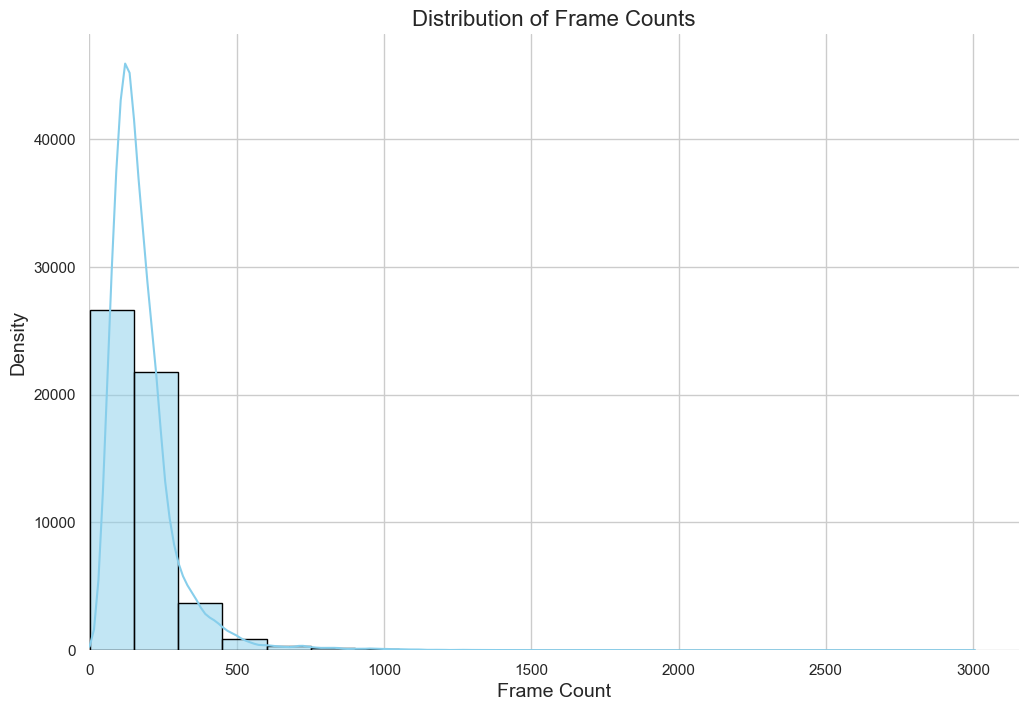

In [54]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

plt.figure(figsize=(12, 8))
plt.xlabel('Frame Count', fontsize=14)
plt.ylabel('Density', fontsize=14)
plt.title('Distribution of Frame Counts', fontsize=16)

sns.histplot(df['frame_count'], bins=20, kde=True, color='skyblue', edgecolor='black')

plt.xlim(left=0)

sns.despine(left=True, bottom=True)

plt.show()

In [1]:
import pandas as pd
#df.to_csv("df_video.csv",index=False)
df_video = pd.read_csv("df_video.csv")
df_video_copy = df_video.sample(n=5000, random_state=42)
df_video_copy

,video_file,frame_count
22506,./01.데이터/1.Training/원천데이터/TS2\SGA2100392\SGA21...,293.0
16234,./01.데이터/1.Training/원천데이터/TS2\SGA2100354\SGA21...,115.0
48307,./01.데이터/1.Training/원천데이터/TS2\SGA2100536\SGA21...,150.0
4060,./01.데이터/1.Training/원천데이터/TS2\SGA2100279\SGA21...,194.0
5785,./01.데이터/1.Training/원천데이터/TS2\SGA2100289\SGA21...,199.0
...,...,...
33588,./01.데이터/1.Training/원천데이터/TS2\SGA2100447\SGA21...,179.0
39149,./01.데이터/1.Training/원천데이터/TS2\SGA2100478\SGA21...,219.0
44134,./01.데이터/1.Training/원천데이터/TS2\SGA2100510\SGA21...,105.0
37168,./01.데이터/1.Training/원천데이터/TS2\SGA2100468\SGA21...,40.0


In [3]:
train_final = pd.read_csv("train_final.csv")
train_final

,img_file,features,label
0,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,"[-0.06670862, -0.11697592, 0.001955851, -0.080...",0
1,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,"[-0.051296912, -0.118120775, -0.0020508997, -0...",1
2,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,"[-0.069831155, -0.10373005, 0.047836777, -0.11...",1
3,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,"[-0.05603712, -0.110149436, 0.036556784, -0.08...",1
4,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,"[-0.07784306, -0.10201416, -0.016004588, -0.14...",0
...,...,...,...
268163,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...,"[0.11090106, -0.12705503, 0.14396569, -0.04089...",1
268164,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...,"[0.12025063, -0.124950506, 0.13321213, -0.0295...",0
268165,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...,"[0.20676906, -0.119568944, 0.093645796, -0.044...",0
268166,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...,"[0.12765072, -0.112616286, 0.07972439, -0.0682...",1


In [ ]:
import tensorflow as tf
import cv2
import numpy as np
import pandas as pd
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.applications.efficientnet import preprocess_input
import os
from tqdm import tqdm
import psutil
import subprocess
import time

#출력로그 제한.
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# GPU 사용 여부 확인 및 메모리 성장 설정
gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        for gpu in gpus:
            tf.config.experimental.set_memory_growth(gpu, True)
        print("GPU 사용 가능 및 메모리 성장 설정 완료.")
    except RuntimeError as e:
        print(e)
else:
    print('GPU를 사용할 수 없습니다.')

# 영상에서 프레임 추출한 데이터 전처리
def extract_features_from_frame(frame, model):
    frame_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
    img_array = cv2.resize(frame_rgb, (224, 224))
    img_array = np.expand_dims(img_array, axis=0)
    img_array = preprocess_input(img_array)
    features = model.predict(img_array, verbose=0)
    return features.flatten()

# 영상에 각기 다른 프레임을 추출한 데이터를 보간하여 통일된 프레임 수로 변환
def interpolate_frames(frames, target_frames):
    current_frames = len(frames)
    if current_frames >= target_frames:
        step = current_frames / target_frames
        interpolated_frames = []
        for i in range(target_frames):
            idx = int(i * step)
            if idx < current_frames - 1:
                alpha = (i * step) - idx
                interpolated_frame = (1 - alpha) * frames[idx] + alpha * frames[idx + 1]
                interpolated_frames.append(interpolated_frame)
            else:
                interpolated_frames.append(frames[idx])
        return interpolated_frames
    
    interpolated_frames = frames.copy()
    while len(interpolated_frames) < target_frames:
        interpolated_frames.append(frames[len(interpolated_frames) % current_frames])
    
    return interpolated_frames[:target_frames]

# 비디오 파일 전처리 및 프레임별 특징추출 함수.
def preprocess_video(video_path, model, target_frames=152):
    cap = cv2.VideoCapture(video_path)
    
    if not cap.isOpened():
        print(f"Error: Cannot open video file {video_path}")
        return None
    
    frames = []
    while cap.isOpened():
        ret, frame = cap.read()
        if not ret:
            break
        try:
            features = extract_features_from_frame(frame, model)
            frames.append(features)
        except Exception as e:
            print(f"Error processing frame: {e}")
            continue
    cap.release()
    
    frames = interpolate_frames(frames, target_frames)
    
    return np.array(frames)

#
def load_videos_and_extract_features(df, model, target_frames=152):
    features_list = []
    total_videos = len(df)
    
    for video_path in tqdm(df['video_file'], desc="Processing videos", unit="video"):
        video_features = preprocess_video(video_path, model, target_frames)
        if video_features is not None:
            features_list.append(video_features)
        else:
            features_list.append(None)
    
    df['features'] = features_list

# EfficientNetB0 모델 로드
efficientnet_model = EfficientNetB0(weights='imagenet', include_top=False, pooling='avg')

# 비디오 파일에서 특징 추출
load_videos_and_extract_features(df_video_copy, efficientnet_model)

# 결과 출력
print(df_video_copy)

In [34]:
# # 프레임 고정 실패 , 프레임 보간법에 문제가 있음 
# import tensorflow as tf
# import cv2
# import numpy as np
# import pandas as pd
# from tensorflow.keras.applications import EfficientNetB0
# from tensorflow.keras.applications.efficientnet import preprocess_input
# import os
# from tqdm import tqdm

# os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'

# # GPU 사용 여부 확인 및 메모리 성장 설정
# gpus = tf.config.experimental.list_physical_devices('GPU')
# if gpus:
#     try:
#         for gpu in gpus:
#             tf.config.experimental.set_memory_growth(gpu, True)
#         print("GPU 사용 가능 및 메모리 성장 설정 완료.")
#     except RuntimeError as e:
#         print(e)
# else:
#     print('GPU를 사용할 수 없습니다.')

# def extract_features_from_frames(frames, model, batch_size=64):
#     frames_rgb = [cv2.cvtColor(frame.astype(np.uint8), cv2.COLOR_BGR2RGB) for frame in frames]  # 데이터 타입 변환 추가
#     img_arrays = [cv2.resize(frame_rgb, (224, 224)) for frame_rgb in frames_rgb]
#     img_arrays = np.array([preprocess_input(img_array) for img_array in img_arrays])
#     features = model.predict(img_arrays, batch_size=batch_size, verbose=0)
#     return features

# def preprocess_video(video_path, model, target_frames=152, batch_size=32):
#     cap = cv2.VideoCapture(video_path)
    
#     if not cap.isOpened():
#         print(f"Error: Cannot open video file {video_path}")
#         return None
    
#     frames = []
#     while cap.isOpened():
#         ret, frame = cap.read()
#         if not ret:
#             break
#         frames.append(frame)
#     cap.release()
    
#     if len(frames) == 0:  # 비디오를 불러올 수 없을 때 예외 처리
#         print(f"Error: No frames extracted from video file {video_path}")
#         return None
    
#     if len(frames) > target_frames:
#         frames = interpolate_frames(frames, target_frames)
    
#     try:
#         features = extract_features_from_frames(frames, model, batch_size)  # 함수 호출 변경
#     except Exception as e:
#         print(f"Error extracting features from video file {video_path}: {e}")
#         return None
    
#     return features

# def load_videos_and_extract_features(df, model, target_frames=152, batch_size=64):
#     features_list = []
#     total_videos = len(df)
    
#     for video_path in tqdm(df['video_file'], desc="Processing videos", unit="video"):
#         video_features = preprocess_video(video_path, model, target_frames, batch_size)
#         if video_features is not None:
#             features_list.append(video_features)
#         else:
#             features_list.append(None)
    
#     df['features'] = features_list

# # EfficientNetB0 모델 로드
# efficientnet_model = EfficientNetB0(weights='imagenet', include_top=False, pooling='avg')

# # 비디오 파일에서 특징 추출
# load_videos_and_extract_features(df_video_copy, efficientnet_model, batch_size=32)

# # 결과 출력
# print(df_video_copy)

GPU 사용 가능 및 메모리 성장 설정 완료.


Processing videos: 100%|██████████████████████████████████████████████████████| 5000/5000 [5:45:18<00:00,  4.14s/video]


                                              video_file  frame_count  \
22506  ./01.데이터/1.Training/원천데이터/TS2\SGA2100392\SGA21...        293.0   
16234  ./01.데이터/1.Training/원천데이터/TS2\SGA2100354\SGA21...        115.0   
48307  ./01.데이터/1.Training/원천데이터/TS2\SGA2100536\SGA21...        150.0   
4060   ./01.데이터/1.Training/원천데이터/TS2\SGA2100279\SGA21...        194.0   
5785   ./01.데이터/1.Training/원천데이터/TS2\SGA2100289\SGA21...        199.0   
...                                                  ...          ...   
33588  ./01.데이터/1.Training/원천데이터/TS2\SGA2100447\SGA21...        179.0   
39149  ./01.데이터/1.Training/원천데이터/TS2\SGA2100478\SGA21...        219.0   
44134  ./01.데이터/1.Training/원천데이터/TS2\SGA2100510\SGA21...        105.0   
37168  ./01.데이터/1.Training/원천데이터/TS2\SGA2100468\SGA21...         40.0   
5683   ./01.데이터/1.Training/원천데이터/TS2\SGA2100288\SGA21...        295.0   

                                                features  
22506  [[-0.115857355, -0.17415078, 0.17719461, 0.056...  
16234

In [9]:
train = pd.read_csv('./train_final.csv')
train

,img_file,features,label
0,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,"[-0.06670862, -0.11697592, 0.001955851, -0.080...",0
1,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,"[-0.051296912, -0.118120775, -0.0020508997, -0...",1
2,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,"[-0.069831155, -0.10373005, 0.047836777, -0.11...",1
3,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,"[-0.05603712, -0.110149436, 0.036556784, -0.08...",1
4,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,"[-0.07784306, -0.10201416, -0.016004588, -0.14...",0
...,...,...,...
268163,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...,"[0.11090106, -0.12705503, 0.14396569, -0.04089...",1
268164,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...,"[0.12025063, -0.124950506, 0.13321213, -0.0295...",0
268165,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...,"[0.20676906, -0.119568944, 0.093645796, -0.044...",0
268166,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...,"[0.12765072, -0.112616286, 0.07972439, -0.0682...",1


In [12]:
df_video = pd.read_csv('./df_video.csv')
df_video

,video_file,frame_count
0,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,135.0
1,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,301.0
2,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,144.0
3,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,155.0
4,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,132.0
...,...,...
53680,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...,138.0
53681,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...,93.0
53682,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...,194.0
53683,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...,120.0


### 모델링 

#### 기본 모델 형식 파라미터튜닝, 파인튜닝 X

In [17]:
import numpy as np      #이미지 데이터 np.array 형태로 변환
import time
start_time = time.time()
X_img = np.array(train_final['features'].apply(eval).tolist())
print("Data preprocessing time: {:.2f} seconds".format(time.time() - start_time))

Data preprocessing time: 421.40 seconds


In [18]:
np.savetxt('X_img.csv', X_img, delimiter=',')

In [4]:
X_img = np.loadtxt('./X_img.csv', delimiter=',')
#X_img = np.load('./X_img.npy')
X_img[1].shape

(1280,)

In [13]:
y_img = train['label']
print(len(y_img))

268168


#### 시각화 모듈 

PCA 소요 시간: 12.97 초


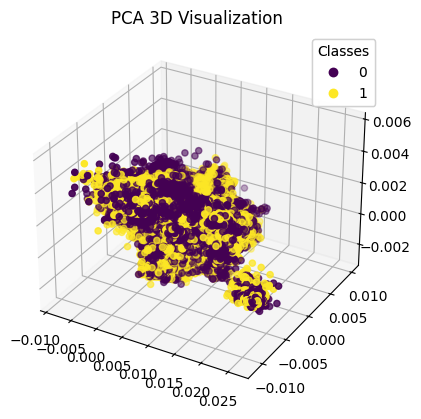

In [20]:
# 전처리된 이미지 파일의 특징 벡터들의 분포를 확인 ,,, 이 파일은 이미지 데이터들을 .npy로 저장한 파일임 그리고 그 npy로 변환된 파일들의 특징벡터를 따온 것
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import time

sample_size = X_img.shape[0]

# 샘플링 수행
np.random.seed(42)  # 재현성을 위해 시드 설정
indices = np.random.choice(X_img.shape[0], sample_size, replace=False)
X_sample = X_img[indices]
y_sample = y_img[indices]

# PCA 소요 시간 측정
start_time = time.time()
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_sample)
end_time = time.time()
print(f"PCA 소요 시간: {end_time - start_time:.2f} 초")


def plot_3d(X, y, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)
    ax.set_title(title)
    plt.show()

# PCA 결과 시각화
plot_3d(X_pca, y_sample, "PCA 3D Visualization")

PCA 소요 시간: 4.72 초


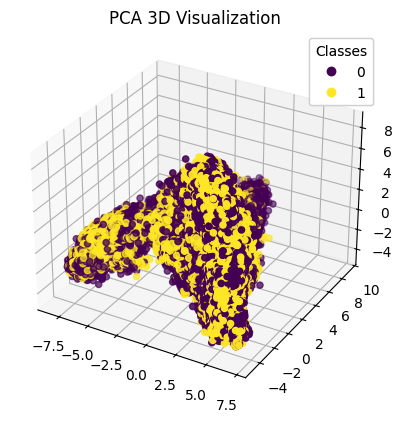

In [14]:
## 이건 원본데이터를 resize 랑 , preprocesse_input  efficientnet에 맞춰서 진행한 데이터 분포인데 생각보다 균형이 잡혀보임. 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import time

sample_size = X_img.shape[0]

# 샘플링 수행
np.random.seed(42)  # 재현성을 위해 시드 설정
indices = np.random.choice(X_img.shape[0], sample_size, replace=False)
X_sample = X_img[indices]
y_sample = y_img[indices]

# PCA 소요 시간 측정
start_time = time.time()
pca = PCA(n_components=3)
X_pca = pca.fit_transform(X_sample)
end_time = time.time()
print(f"PCA 소요 시간: {end_time - start_time:.2f} 초")


def plot_3d(X, y, title):
    fig = plt.figure()
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
    legend1 = ax.legend(*scatter.legend_elements(), title="Classes")
    ax.add_artist(legend1)
    ax.set_title(title)
    plt.show()

# PCA 결과 시각화
plot_3d(X_pca, y_sample, "PCA 3D Visualization")

PCA 소요 시간: 13.40 초


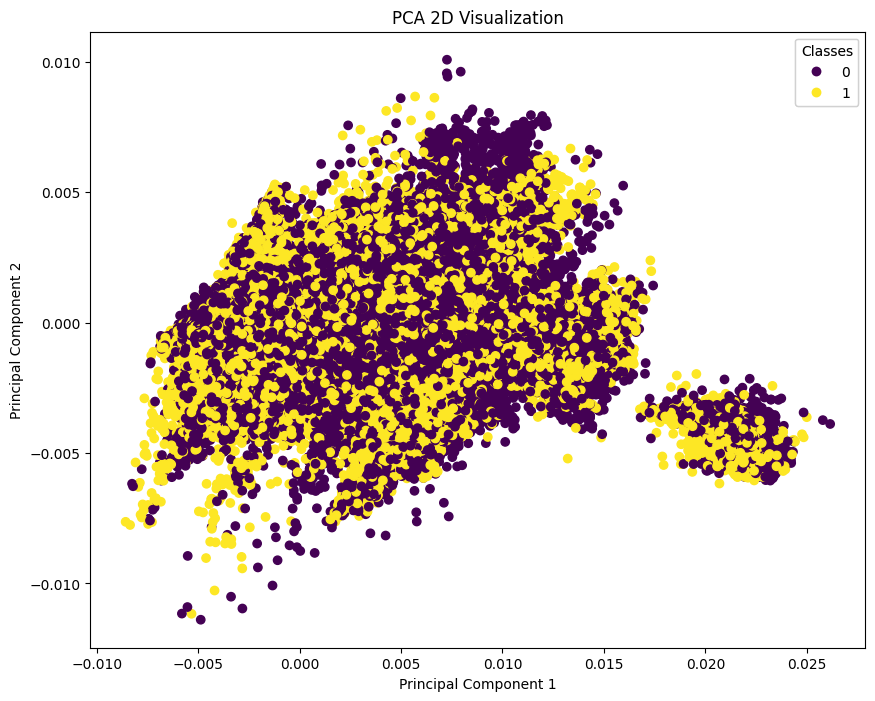

In [23]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import time


sample_size = X_img.shape[0]

# 샘플링 수행
np.random.seed(42)  # 재현성을 위해 시드 설정
indices = np.random.choice(X_img.shape[0], sample_size, replace=False)
X_sample = X_img[indices]
y_sample = y_img[indices]

# PCA 소요 시간 측정
start_time = time.time()
pca = PCA(n_components=2)  # 2차원으로 변경
X_pca = pca.fit_transform(X_sample)
end_time = time.time()
print(f"PCA 소요 시간: {end_time - start_time:.2f} 초")

def plot_2d(X, y, title):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
    plt.gca().add_artist(legend1)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# PCA 결과 시각화
plot_2d(X_pca, y_sample, "PCA 2D Visualization")

PCA 소요 시간: 4.59 초


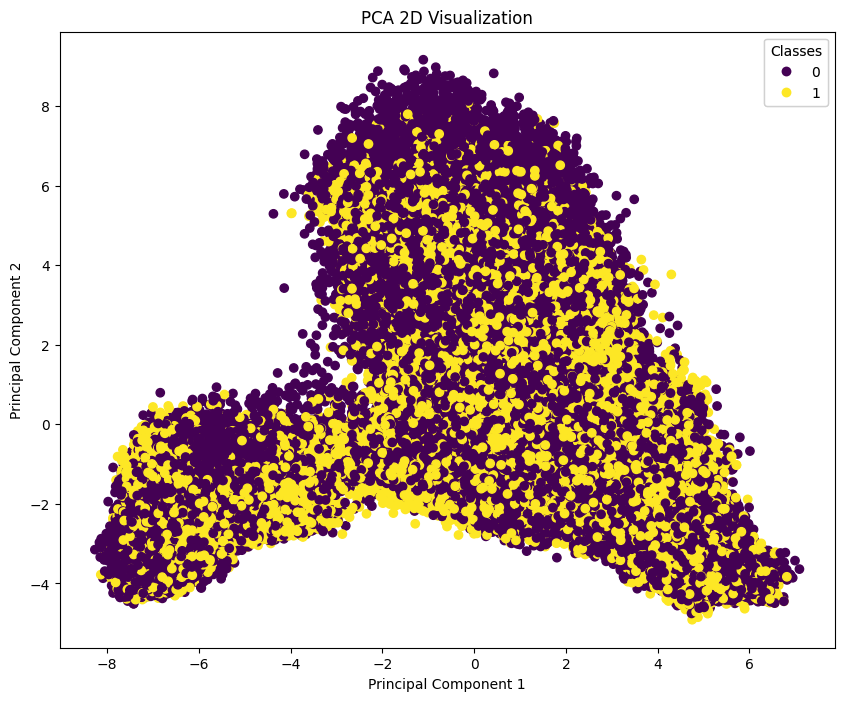

In [15]:
# 생각보다 전처리했을때 사진 데이터보다 , 역시 원본데이터를 특징추출한 데이터가 조금 더 균형이 잡아 보임

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import time


sample_size = X_img.shape[0]

# 샘플링 수행
np.random.seed(42)  # 재현성을 위해 시드 설정
indices = np.random.choice(X_img.shape[0], sample_size, replace=False)
X_sample = X_img[indices]
y_sample = y_img[indices]

# PCA 소요 시간 측정
start_time = time.time()
pca = PCA(n_components=2)  # 2차원으로 변경
X_pca = pca.fit_transform(X_sample)
end_time = time.time()
print(f"PCA 소요 시간: {end_time - start_time:.2f} 초")

def plot_2d(X, y, title):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
    plt.gca().add_artist(legend1)
    plt.title(title)
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.show()

# PCA 결과 시각화
plot_2d(X_pca, y_sample, "PCA 2D Visualization")

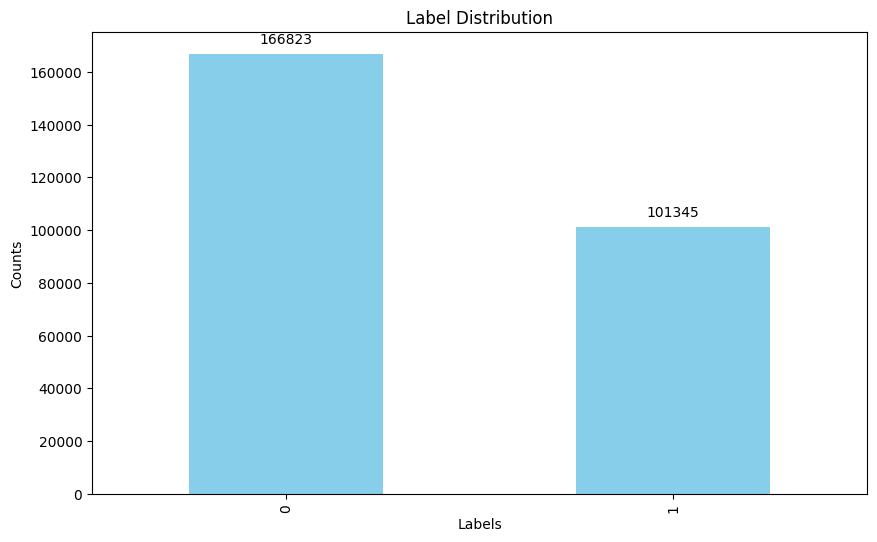

In [106]:
import matplotlib.pyplot as plt

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 바 그래프 생성
ax = train['label'].value_counts().plot(kind='bar', color='skyblue')

# 각 바의 중앙에 숫자 표시
for p in ax.patches:
    ax.annotate(str(p.get_height()), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                xytext=(0, 10), 
                textcoords='offset points')

# 그래프 제목과 축 레이블 추가 (선택 사항)
ax.set_title('Label Distribution')
ax.set_xlabel('Labels')
ax.set_ylabel('Counts')

# 그래프 표시
plt.show()

t-SNE 소요 시간: 339.10 초


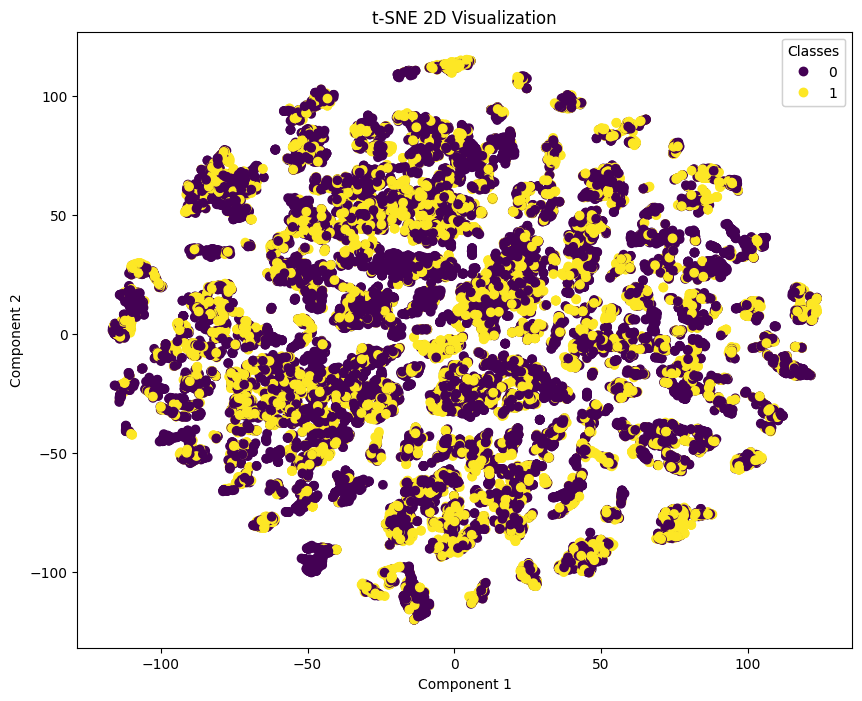

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import time

sample_size = int(0.1*X_img.shape[0])
np.random.seed(42)  # 재현성을 위해 시드 설정
indices = np.random.choice(X_img.shape[0], sample_size, replace=False)
X_sample = X_img[indices]
y_sample = y_img[indices]

# t-SNE 소요 시간 측정
start_time = time.time()
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_sample)
end_time = time.time()
print(f"t-SNE 소요 시간: {end_time - start_time:.2f} 초")

def plot_2d(X, y, title):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
    plt.gca().add_artist(legend1)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

# t-SNE 결과 시각화
plot_2d(X_tsne, y_sample, "t-SNE 2D Visualization")

## 특징벡터로 tsne 비선형 차원축소로 라벨2개이기에 , 1280 길이인 특징벡터를 길이가 2인 벡터로 줄여서 라벨의 분포를 확인해도 제대로 군집이 되어있지 않음. 
## 그래서 아래와 같은 accuracy 자체가 70% 정도로 낮은 값을 가지는 것으로 확인된다. 

t-SNE 소요 시간: 927.21 초


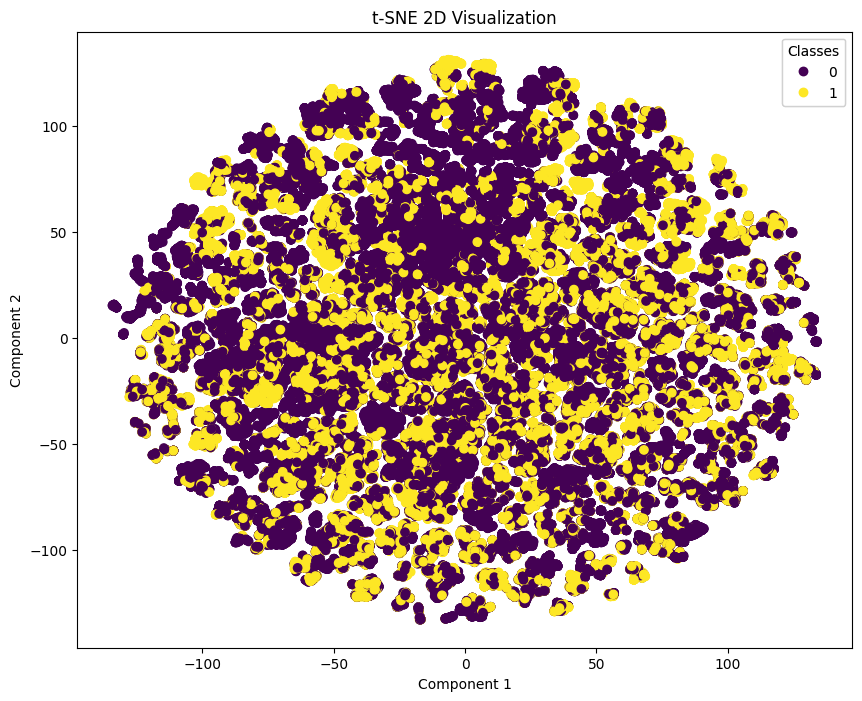

In [18]:
# 원본데이터의 1280길이를 가진 특징벡터를 2차원으로 축소 후 시각화를 했는데 사실 1280의 길이를 2로 줄이는 것이기에 데이터 손실이 굉장히 큼,
# 그냥 1차원적으로 clustering이 잘 되었는지 확인하는 정도의 용도
# 결론은 이것만 가지고는 정확한 판단이 불가함.
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE
import time

sample_size = int(0.5*X_img.shape[0])
np.random.seed(42)  # 재현성을 위해 시드 설정
indices = np.random.choice(X_img.shape[0], sample_size, replace=False)
X_sample = X_img[indices]
y_sample = y_img[indices]

# t-SNE 소요 시간 측정
start_time = time.time()
tsne = TSNE(n_components=2, random_state=42)
X_tsne = tsne.fit_transform(X_sample)
end_time = time.time()
print(f"t-SNE 소요 시간: {end_time - start_time:.2f} 초")

def plot_2d(X, y, title):
    plt.figure(figsize=(10, 8))
    scatter = plt.scatter(X[:, 0], X[:, 1], c=y, cmap='viridis')
    legend1 = plt.legend(*scatter.legend_elements(), title="Classes")
    plt.gca().add_artist(legend1)
    plt.title(title)
    plt.xlabel('Component 1')
    plt.ylabel('Component 2')
    plt.show()

# t-SNE 결과 시각화
plot_2d(X_tsne, y_sample, "t-SNE 2D Visualization")

## 특징벡터로 tsne 비선형 차원축소로 라벨2개이기에 , 1280 길이인 특징벡터를 길이가 2인 벡터로 줄여서 라벨의 분포를 확인해도 제대로 군집이 되어있지 않음. 
## 그래서 아래와 같은 accuracy 자체가 70% 정도로 낮은 값을 가지는 것으로 확인된다. 

<Figure size 1000x600 with 0 Axes>

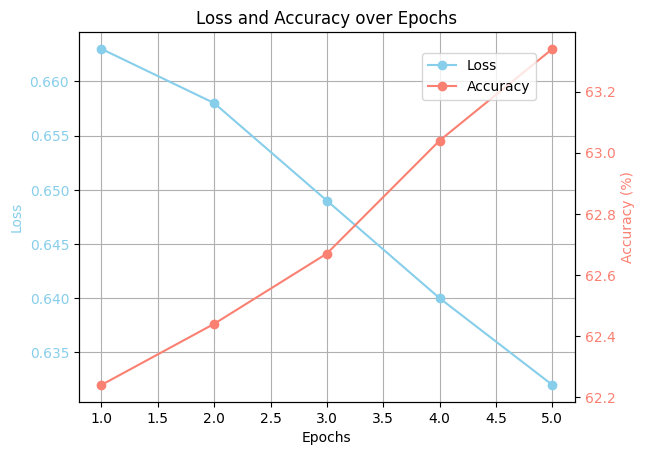

In [117]:
import matplotlib.pyplot as plt

# 에포크마다의 loss와 accuracy 데이터
epochs = [1, 2, 3, 4, 5]
loss = [0.663, 0.658, 0.649, 0.640, 0.632]
accuracy = [62.24, 62.44, 62.67, 63.04, 63.34]

# 그래프 크기 설정
plt.figure(figsize=(10, 6))

# 첫 번째 y축 (Loss)
fig, ax1 = plt.subplots()

ax1.plot(epochs, loss, marker='o', color='skyblue', label='Loss')
ax1.set_xlabel('Epochs')
ax1.set_ylabel('Loss', color='skyblue')
ax1.tick_params(axis='y', labelcolor='skyblue')
ax1.set_title('Loss and Accuracy over Epochs')
ax1.grid(True)

# 두 번째 y축 (Accuracy)
ax2 = ax1.twinx()
ax2.plot(epochs, accuracy, marker='o', color='salmon', label='Accuracy')
ax2.set_ylabel('Accuracy (%)', color='salmon')
ax2.tick_params(axis='y', labelcolor='salmon')

# 범례 추가
fig.legend(loc='upper right', bbox_to_anchor=(0.85, 0.85))

# 그래프 표시
plt.show()

In [19]:
# 0.62? 정도 밖에 성능이 안나옴 :> npy 파일로 전처리된 데이터의 성능 
# 원본 데이터의 성능 : 0.8  / val_accuracy : 0.78    역시 원본데이터 자체를 건드는게 훨씬 낫다. 

import tensorflow as tf
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import LSTM, Dense
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        # 첫 번째 GPU만 사용하도록 설정
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
    except RuntimeError as e:
        print(e)
else:
    print("사용 가능한 GPU가 없습니다.")
    
X_img_train , X_img_val, y_img_train, y_img_val = train_test_split(X_img, y_img , test_size = 0.2 ,  random_state =42)

model = Sequential()
model.add(LSTM(128, input_shape=(1,X_img.shape[1]), return_sequences=False))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam' , loss='binary_crossentropy' , metrics=['accuracy'])

X_img_train_reshaped = np.expand_dims(X_img_train, axis=1)
X_img_val_reshaped = np.expand_dims(X_img_val, axis=1)

model.fit(X_img_train_reshaped , y_img_train, epochs=10 , batch_size=16, validation_data = (X_img_val_reshaped,y_img_val))



Epoch 1/10
13409/13409 [==============================] - 53s 4ms/step - loss: 0.5283 - accuracy: 0.7111 - val_loss: 0.4920 - val_accuracy: 0.7364
Epoch 2/10
13409/13409 [==============================] - 52s 4ms/step - loss: 0.4737 - accuracy: 0.7490 - val_loss: 0.4740 - val_accuracy: 0.7516
Epoch 3/10
13409/13409 [==============================] - 52s 4ms/step - loss: 0.4514 - accuracy: 0.7632 - val_loss: 0.4529 - val_accuracy: 0.7630
Epoch 4/10
13409/13409 [==============================] - 52s 4ms/step - loss: 0.4366 - accuracy: 0.7727 - val_loss: 0.4436 - val_accuracy: 0.7666
Epoch 5/10
13409/13409 [==============================] - 52s 4ms/step - loss: 0.4247 - accuracy: 0.7796 - val_loss: 0.4371 - val_accuracy: 0.7716
Epoch 6/10
13409/13409 [==============================] - 52s 4ms/step - loss: 0.4143 - accuracy: 0.7862 - val_loss: 0.4303 - val_accuracy: 0.7759
Epoch 7/10
13409/13409 [==============================] - 52s 4ms/step - loss: 0.4053 - accuracy: 0.7903 - val_loss: 0

In [44]:
# dropout (0.3), batchnormalization , dense층 형성  
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization

model = Sequential()
model.add(LSTM(256, input_shape=(1, X_img.shape[1]), return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(128, return_sequences=False))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_img_train_reshaped, y_img_train, epochs=20, batch_size=32, validation_data=(X_img_val_reshaped,y_img_val))
val_loss, val_accuracy = model.evaluate(X_img_val_reshaped, y_img_val)
print(f'Validation Accuracy: {val_accuracy}')

Epoch 1/20
6705/6705 ━━━━━━━━━━━━━━━━━━━━ 99s 14ms/step - accuracy: 0.6141 - loss: 0.6691 - val_accuracy: 0.6241 - val_loss: 0.6633
Epoch 2/20
6705/6705 ━━━━━━━━━━━━━━━━━━━━ 88s 13ms/step - accuracy: 0.6216 - loss: 0.6636 - val_accuracy: 0.6241 - val_loss: 0.6625
Epoch 3/20
6705/6705 ━━━━━━━━━━━━━━━━━━━━ 85s 13ms/step - accuracy: 0.6222 - loss: 0.6631 - val_accuracy: 0.6241 - val_loss: 0.6623
Epoch 4/20
6705/6705 ━━━━━━━━━━━━━━━━━━━━ 86s 13ms/step - accuracy: 0.6219 - loss: 0.6632 - val_accuracy: 0.6241 - val_loss: 0.6623
Epoch 5/20
6705/6705 ━━━━━━━━━━━━━━━━━━━━ 88s 13ms/step - accuracy: 0.6205 - loss: 0.6639 - val_accuracy: 0.6241 - val_loss: 0.6622
Epoch 6/20
6705/6705 ━━━━━━━━━━━━━━━━━━━━ 87s 13ms/step - accuracy: 0.6225 - loss: 0.6628 - val_accuracy: 0.6241 - val_loss: 0.6623
Epoch 7/20
6705/6705 ━━━━━━━━━━━━━━━━━━━━ 86s 13ms/step - accuracy: 0.6204 - loss: 0.6639 - val_accuracy: 0.6241 - val_loss: 0.6622
Epoch 8/20
6705/6705 ━━━━━━━━━━━━━━━━━━━━ 86s 13ms/step - accuracy: 0.6237 -

#### Conv1d 층 추가해서 모델링 

In [20]:
from sklearn.model_selection import train_test_split
X_img_train, X_img_val, y_img_train, y_img_val = train_test_split(X_img, y_img, test_size =0.2, random_state= 42)

In [10]:
# 사실상 특징벡터로만 이루어진 데이터 들이라서 , conv1d ,를 사용하는게 아무런 변환도 수행하지 않는다. fully connected layer를 사용하는게 낫다. 
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense , LSTM, Dropout, BatchNormalization, Conv1D, MaxPooling1D


gpus = tf.config.experimental.list_physical_devices('GPU')
if gpus:
    try:
        tf.config.experimental.set_visible_devices(gpus[0], 'GPU')
        tf.config.experimental.set_memory_growth(gpus[0], True)
        print("GPU 사용 가능: ", gpus[0])
    except RuntimeError as e:
        print(e)
else:
    print("사용 가능한 GPU가 없습니다.")
    
X_img_train_reshaped = np.expand_dims(X_img_train, axis=1)
X_img_val_reshaped = np.expand_dims(X_img_val, axis=1)


model = Sequential()
model.add(Conv1D(64, kernel_size=1, activation='relu', input_shape=(1, X_img.shape[1])))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(128, kernel_size=1, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(256, kernel_size=1, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(LSTM(256, return_sequences=True))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

model.fit(X_img_train_reshaped, y_img_train, epochs=30, batch_size=64, validation_data=(X_img_val_reshaped, y_img_val))


val_loss, val_accuracy = model.evaluate(X_img_val_reshaped, y_img_val)
print(f'Validation Accuracy: {val_accuracy}')

사용 가능한 GPU가 없습니다.


C:\Users\pbcho\Anaconda3\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:99: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(


Epoch 1/30
3353/3353 ━━━━━━━━━━━━━━━━━━━━ 33s 9ms/step - accuracy: 0.6183 - loss: 0.6670 - val_accuracy: 0.6241 - val_loss: 0.6626
Epoch 2/30
3353/3353 ━━━━━━━━━━━━━━━━━━━━ 28s 8ms/step - accuracy: 0.6211 - loss: 0.6641 - val_accuracy: 0.6241 - val_loss: 0.6626
Epoch 3/30
3353/3353 ━━━━━━━━━━━━━━━━━━━━ 28s 8ms/step - accuracy: 0.6216 - loss: 0.6636 - val_accuracy: 0.6241 - val_loss: 0.6625
Epoch 4/30
3353/3353 ━━━━━━━━━━━━━━━━━━━━ 28s 8ms/step - accuracy: 0.6199 - loss: 0.6642 - val_accuracy: 0.6241 - val_loss: 0.6624
Epoch 5/30
3353/3353 ━━━━━━━━━━━━━━━━━━━━ 29s 9ms/step - accuracy: 0.6203 - loss: 0.6640 - val_accuracy: 0.6241 - val_loss: 0.6624
Epoch 6/30
3353/3353 ━━━━━━━━━━━━━━━━━━━━ 31s 9ms/step - accuracy: 0.6229 - loss: 0.6627 - val_accuracy: 0.6241 - val_loss: 0.6624
Epoch 7/30
3353/3353 ━━━━━━━━━━━━━━━━━━━━ 32s 9ms/step - accuracy: 0.6211 - loss: 0.6636 - val_accuracy: 0.6241 - val_loss: 0.6624
Epoch 8/30
3353/3353 ━━━━━━━━━━━━━━━━━━━━ 31s 9ms/step - accuracy: 0.6208 - loss: 0

#### 시퀀스로 이미지를 처리하려 하였으나 , 문제가 각 이미지 별로 라벨링 된 action 이 다르고  그 action 별로 라벨이 다르기 때문에 개별 이미지로 판단 

In [11]:
# 좀 더 깊은 layer층 생성, 
model = Sequential()
model.add(Conv1D(64, kernel_size=1, activation='relu', input_shape=(1, X_img.shape[1])))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(128, kernel_size=1, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(256, kernel_size=1, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Conv1D(512, kernel_size=1, activation='relu'))
model.add(MaxPooling1D(pool_size=1))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(X_img_train_reshaped, y_img_train, epochs=30, batch_size=64, validation_data=(X_img_val_reshaped, y_img_val))

# 모델 평가
val_loss, val_accuracy = model.evaluate(X_img_val_reshaped, y_img_val)
print(f'Validation Accuracy: {val_accuracy}')

Epoch 1/30
3353/3353 ━━━━━━━━━━━━━━━━━━━━ 33s 9ms/step - accuracy: 0.6182 - loss: 0.6676 - val_accuracy: 0.6241 - val_loss: 0.6626
Epoch 2/30
3353/3353 ━━━━━━━━━━━━━━━━━━━━ 35s 10ms/step - accuracy: 0.6230 - loss: 0.6629 - val_accuracy: 0.6241 - val_loss: 0.6624
Epoch 3/30
3353/3353 ━━━━━━━━━━━━━━━━━━━━ 38s 11ms/step - accuracy: 0.6219 - loss: 0.6633 - val_accuracy: 0.6241 - val_loss: 0.6624
Epoch 4/30
3353/3353 ━━━━━━━━━━━━━━━━━━━━ 42s 12ms/step - accuracy: 0.6193 - loss: 0.6645 - val_accuracy: 0.6241 - val_loss: 0.6624
Epoch 5/30
3353/3353 ━━━━━━━━━━━━━━━━━━━━ 47s 14ms/step - accuracy: 0.6225 - loss: 0.6628 - val_accuracy: 0.6241 - val_loss: 0.6624
Epoch 6/30
3353/3353 ━━━━━━━━━━━━━━━━━━━━ 52s 16ms/step - accuracy: 0.6225 - loss: 0.6629 - val_accuracy: 0.6241 - val_loss: 0.6625
Epoch 7/30
3353/3353 ━━━━━━━━━━━━━━━━━━━━ 61s 18ms/step - accuracy: 0.6229 - loss: 0.6627 - val_accuracy: 0.6241 - val_loss: 0.6624
Epoch 8/30
3353/3353 ━━━━━━━━━━━━━━━━━━━━ 56s 17ms/step - accuracy: 0.6203 - 

#### 데이터 증강 , 및 스케일링 진행 

In [21]:
# 텐서로 데이터 증강해서 하니까 70% 정도의 accuracy 를 가진다.
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Dropout, BatchNormalization
from imblearn.over_sampling import SMOTE

# 예시 데이터 생성 (실제 데이터로 대체 필요)
# X_img = df_features.to_numpy()
# y_img = df_labels.to_numpy()

# 데이터 분할
X_img_train, X_img_val, y_img_train, y_img_val = train_test_split(X_img, y_img, test_size=0.2, random_state=42)

# 데이터 정규화
scaler = StandardScaler()
X_img_train = scaler.fit_transform(X_img_train)
X_img_val = scaler.transform(X_img_val)

# 데이터 3차원 변환
X_img_train_reshaped = np.expand_dims(X_img_train, axis=1)
X_img_val_reshaped = np.expand_dims(X_img_val, axis=1)

# SMOTE 오버샘플링
smote = SMOTE(random_state=42)
X_img_train_resampled, y_img_train_resampled = smote.fit_resample(X_img_train_reshaped.reshape(-1, X_img_train_reshaped.shape[-1]), y_img_train)
X_img_train_resampled = np.expand_dims(X_img_train_resampled, axis=1)

# 모델 정의
model = Sequential()
model.add(LSTM(512, return_sequences=True, input_shape=(1, X_img.shape[1])))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(LSTM(256, return_sequences=True))
# model.add(Dropout(0.3))
# model.add(BatchNormalization())
model.add(LSTM(128, return_sequences=False))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(128, activation='relu'))
# model.add(Dropout(0.3))
# model.add(BatchNormalization())
model.add(Dense(64, activation='relu'))
model.add(Dropout(0.3))
model.add(BatchNormalization())
model.add(Dense(1, activation='sigmoid'))


model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# 모델 학습
model.fit(X_img_train_resampled, y_img_train_resampled, epochs=20, batch_size=128, validation_data=(X_img_val_reshaped, y_img_val))

# 모델 평가
val_loss, val_accuracy = model.evaluate(X_img_val_reshaped, y_img_val)
print(f'Validation Accuracy: {val_accuracy}')

C:\Users\pbcho\Anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 94s 42ms/step - accuracy: 0.5500 - loss: 0.7086 - val_accuracy: 0.6244 - val_loss: 0.6433
Epoch 2/20
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 86s 41ms/step - accuracy: 0.6102 - loss: 0.6499 - val_accuracy: 0.5777 - val_loss: 0.6464
Epoch 3/20
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 88s 42ms/step - accuracy: 0.6296 - loss: 0.6336 - val_accuracy: 0.6605 - val_loss: 0.6017
Epoch 4/20
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 89s 43ms/step - accuracy: 0.6422 - loss: 0.6216 - val_accuracy: 0.6514 - val_loss: 0.5989
Epoch 5/20
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 98s 47ms/step - accuracy: 0.6474 - loss: 0.6152 - val_accuracy: 0.6590 - val_loss: 0.5968
Epoch 6/20
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 89s 43ms/step - accuracy: 0.6527 - loss: 0.6088 - val_accuracy: 0.6347 - val_loss: 0.5990
Epoch 7/20
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 88s 42ms/step - accuracy: 0.6628 - loss: 0.5996 - val_accuracy: 0.6497 - val_loss: 0.5911
Epoch 8/20
2084/2084 ━━━━━━━━━━━━━━━━━━━━ 88s 42ms/step - accuracy: 0.6685 -

In [35]:
model.save('test_model_oversample.keras')

#### pytorch 사용 모델링 

In [43]:
# pytorch 로 정규화를 진행해서 모델링을 돌리니 70% 정도의 accuracy를 가진다.
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from sklearn.preprocessing import StandardScaler

# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X_img, y_img, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.transform(X_val)

# NumPy 배열을 PyTorch 텐서로 변환
X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.to_numpy(), dtype=torch.long)  # Numpy 배열로 변환
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.to_numpy(), dtype=torch.long)  # Numpy 배열로 변환
#torch.long은 

# 데이터셋 및 데이터로더 생성
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

import torch.nn as nn
import torch.optim as optim

class FCNN(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(FCNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 1024)
        self.dropout1 = nn.Dropout(0.5)
        self.bn1 = nn.BatchNorm1d(1024)
        self.fc2 = nn.Linear(1024, 512)
        self.dropout2 = nn.Dropout(0.5)
        self.bn2 = nn.BatchNorm1d(512)
        self.fc3 = nn.Linear(512, 256)
        self.dropout3 = nn.Dropout(0.5)
        self.bn3 = nn.BatchNorm1d(256)
        self.fc4 = nn.Linear(256, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.dropout1(x)
        x = self.bn1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = self.dropout2(x)
        x = self.bn2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        x = self.dropout3(x)
        x = self.bn3(x)
        x = torch.relu(x)
        x = self.fc4(x)
        return x

# 모델 인스턴스 생성
input_dim = X_train.shape[1]  # 특징 벡터의 차원
num_classes = len(np.unique(y_img))  # 클래스 수
model = FCNN(input_dim, num_classes)

# 손실 함수 및 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.0001)

# CUDA 사용 가능 여부 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 조기 종료 설정
best_val_loss = float('inf')
patience = 5
trigger_times = 0

# 모델 학습
num_epochs = 30
for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    for inputs, labels in train_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}")
    
    # Validation
    model.eval()
    val_loss = 0.0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            loss = criterion(outputs, labels)
            val_loss += loss.item()
    
    val_loss /= len(val_loader)
    print(f"Validation Loss: {val_loss}")
    
    if val_loss < best_val_loss:
        best_val_loss = val_loss
        trigger_times = 0
        torch.save(model.state_dict(), 'best_model.pth')
    else:
        trigger_times += 1
        if trigger_times >= patience:
            print('Early stopping!')
            break

# Load the best model
model.load_state_dict(torch.load('best_model.pth'))

# 모델 평가
model.eval()
correct = 0
total = 0
with torch.no_grad():
    for inputs, labels in val_loader:
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = model(inputs)
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Validation Accuracy: {100 * correct / total}%')

Epoch [1/30], Loss: 0.6561252077776136
Validation Loss: 0.6491673351151643
Epoch [2/30], Loss: 0.6379304706872532
Validation Loss: 0.6489408958789914
Epoch [3/30], Loss: 0.6282461281546365
Validation Loss: 0.6360193621422752
Epoch [4/30], Loss: 0.6213306915528911
Validation Loss: 0.6270193057040337
Epoch [5/30], Loss: 0.6146526821774391
Validation Loss: 0.6438208436887749
Epoch [6/30], Loss: 0.6102134921717874
Validation Loss: 0.6018935418157402
Epoch [7/30], Loss: 0.6056043793868876
Validation Loss: 0.6329060042800119
Epoch [8/30], Loss: 0.6006664102865101
Validation Loss: 0.5895707567639484
Epoch [9/30], Loss: 0.5976796289729503
Validation Loss: 0.5957320837229579
Epoch [10/30], Loss: 0.5938450277651717
Validation Loss: 0.5802458484541041
Epoch [11/30], Loss: 0.5910814177181007
Validation Loss: 0.6370570487256696
Epoch [12/30], Loss: 0.5882271704746662
Validation Loss: 0.634806594467618
Epoch [13/30], Loss: 0.5845621274043872
Validation Loss: 0.5915789054523427
Epoch [14/30], Loss: 0

C:\Users\pbcho\AppData\Local\Temp\ipykernel_22720\746847209.py:119: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load('best_model.pth'))


Validation Accuracy: 69.73561546780027%


In [18]:
#SMOTE를 사용해서 라벨의 균형을 맞추고 진행을 한다.. 그래도 특징벡터이기에 성능이 저조할 수 있음.
import torch
import numpy as np
from sklearn.model_selection import train_test_split
from torch.utils.data import DataLoader, TensorDataset
from imblearn.over_sampling import SMOTE
from tqdm import tqdm  # tqdm 라이브러리 추가
from sklearn.preprocessing import StandardScaler

# 데이터 분할
X_train, X_val, y_train, y_val = train_test_split(X_img, y_img, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_val = scaler.fit_transform(X_val)

# SMOTE를 사용한 오버샘플링
smote = SMOTE(sampling_strategy={0: 160000, 1: 160000}, random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

# NumPy 배열을 PyTorch 텐서로 변환
X_train_tensor = torch.tensor(X_train_resampled, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train_resampled, dtype=torch.long)
X_val_tensor = torch.tensor(X_val, dtype=torch.float32)
y_val_tensor = torch.tensor(y_val.to_numpy(), dtype=torch.long)

# 데이터셋 및 데이터로더 생성
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
val_dataset = TensorDataset(X_val_tensor, y_val_tensor)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

import torch.nn as nn
import torch.optim as optim

class FCNN(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(FCNN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 512)
        self.dropout1 = nn.Dropout(0.3)
        self.bn1 = nn.BatchNorm1d(512)
        self.fc2 = nn.Linear(512, 256)
        self.dropout2 = nn.Dropout(0.3)
        self.bn2 = nn.BatchNorm1d(256)
        self.fc3 = nn.Linear(256, 128)
        self.dropout3 = nn.Dropout(0.3)
        self.bn3 = nn.BatchNorm1d(128)
        self.fc4 = nn.Linear(128, num_classes)

    def forward(self, x):
        x = self.fc1(x)
        x = self.dropout1(x)
        x = self.bn1(x)
        x = torch.relu(x)
        x = self.fc2(x)
        x = self.dropout2(x)
        x = self.bn2(x)
        x = torch.relu(x)
        x = self.fc3(x)
        x = self.dropout3(x)
        x = self.bn3(x)
        x = torch.relu(x)
        x = self.fc4(x)
        return x

# 모델 인스턴스 생성
input_dim = X_train.shape[1]  # 특징 벡터의 차원
num_classes = len(np.unique(y_img))  # 클래스 수
model = FCNN(input_dim, num_classes)

# 손실 함수 및 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

# CUDA 사용 가능 여부 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

if torch.cuda.is_available():
    print(f"CUDA is available. PyTorch version: {torch.__version__}")
    print(f"CUDA version: {torch.version.cuda}")
    print(f"Number of GPUs: {torch.cuda.device_count()}")
    print(f"Current GPU: {torch.cuda.current_device()}")
    print(f"GPU Name: {torch.cuda.get_device_name(torch.cuda.current_device())}")
else:
    print("CUDA is not available.")

# 모델 학습
num_epochs = 20
best_val_accuracy = 0.0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    train_loader_tqdm = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)
    
    for inputs, labels in train_loader_tqdm:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        train_loader_tqdm.set_postfix(loss=running_loss/len(train_loader))
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}")

    # 모델 평가
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f'Validation Accuracy: {val_accuracy}%')

    # 최상의 검증 성능을 가진 모델 저장
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(model.state_dict(), 'best_model.pth')

print(f'Best Validation Accuracy: {best_val_accuracy}%')

### 모델링 방안2 , 전처리된 이미지 데이터로 전이학습 실시 

In [2]:
import pandas as pd
import numpy as np
df_target = pd.read_csv("train_final.csv" )
df_target = df_target[['img_file','label']]
df_target

,img_file,label
0,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,0
1,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,1
2,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,1
3,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,1
4,./01.데이터/1.Training/원천데이터/TS2\SGA2100258\SGA21...,0
...,...,...
268163,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...,1
268164,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...,0
268165,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...,0
268166,./01.데이터/1.Training/원천데이터/TS2\SGA2100567\SGA21...,1


In [18]:
df_target = df[['processed_img_file','label']]
df_target['label'].value_counts() # 106864 0 ,  166864 1  이상행동이 훨씬 더 많은 것을 확인한다. 
df_target

,processed_img_file,label
0,processed_images2\SGA2100258S0000IMG0001.jpg.npy,0
1,processed_images2\SGA2100258S0000IMG0002.jpg.npy,1
2,processed_images2\SGA2100258S0000IMG0003.jpg.npy,1
3,processed_images2\SGA2100258S0000IMG0004.jpg.npy,1
4,processed_images2\SGA2100258S0000IMG0005.jpg.npy,0
...,...,...
268246,processed_images2\SGA2100567S0361IMG0001.jpg.npy,1
268247,processed_images2\SGA2100567S0361IMG0002.jpg.npy,1
268248,processed_images2\SGA2100567S0361IMG0003.jpg.npy,1
268249,processed_images2\SGA2100567S0361IMG0004.jpg.npy,0


In [34]:
import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

sample_size = int(0.1 * len(df_target))
sample_indices = np.arange(sample_size)

# 이미지 경로와 라벨 추출
image_paths = df_target['processed_img_file'].values[sample_indices]
labels = df_target['label'].values[sample_indices]


# 이미지를 5개씩 시퀀스로 그룹화
sequence_length = 5
num_sequences = len(image_paths) // sequence_length

image_sequences = [image_paths[i*sequence_length:(i+1)*sequence_length] for i in range(num_sequences)]
label_sequences = [labels[i*sequence_length:(i+1)*sequence_length] for i in range(num_sequences)]

class ImageSequenceDataset(Dataset):
    def __init__(self, image_sequences, label_sequences):
        self.image_sequences = image_sequences
        self.label_sequences = label_sequences

    def __len__(self):
        return len(self.image_sequences)

    def __getitem__(self, idx):
        images = [np.load(img_path) for img_path in self.image_sequences[idx]]
        labels = self.label_sequences[idx]
        
        # 이미지 배열을 (H, W, C)에서 (C, H, W)로 변환
        images = [torch.tensor(img, dtype=torch.float32).permute(2, 0, 1) for img in images]
        labels = torch.tensor(labels, dtype=torch.long)
        
        return torch.stack(images), labels

# 데이터셋 인스턴스 생성
dataset = ImageSequenceDataset(image_sequences, label_sequences)

# 데이터 분할
train_indices, val_indices = train_test_split(np.arange(len(dataset)), test_size=0.2, random_state=42)

train_dataset = torch.utils.data.Subset(dataset, train_indices)
val_dataset = torch.utils.data.Subset(dataset, val_indices)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)

In [12]:
import torch
import torch.nn as nn
import torchvision.models as models
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from tqdm import tqdm

class EfficientNetWithCNN(nn.Module):
    def __init__(self, num_classes):
        super(EfficientNetWithCNN, self).__init__()
        self.efficientnet = models.efficientnet_b0(pretrained=True)
        self.efficientnet.classifier = nn.Identity()  # 기존 분류 레이어 제거
        
        # 추가 CNN 레이어
        self.additional_cnn = nn.Sequential(
            nn.Conv2d(1280, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten()
        )
        
        # Fully Connected 레이어
        self.fc = nn.Sequential(
            nn.Linear(256 * 1 * 1, 1024),  # 7x7 -> 3x3 -> 1x1
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, num_classes)
        )

    def forward(self, x):
        batch_size, seq_len, c, h, w = x.size()
        x = x.view(batch_size * seq_len, c, h, w)  # 배치와 시퀀스 차원을 평탄화
        x = self.efficientnet.features(x)  # EfficientNet의 특징 추출기 부분만 사용
        x = self.additional_cnn(x)
        x = x.view(batch_size, seq_len, -1)  # (batch_size, seq_len, features)로 다시 변형
        x = x.mean(dim=1)  # 시퀀스 차원에 대해 평균
        x = self.fc(x)
        return x

class ImageSequenceDataset(Dataset):
    def __init__(self, image_sequences, label_sequences):
        self.image_sequences = image_sequences
        self.label_sequences = label_sequences

    def __len__(self):
        return len(self.image_sequences)

    def __getitem__(self, idx):
        images = [np.load(img_path) for img_path in self.image_sequences[idx]]
        labels = self.label_sequences[idx]
        
        # 다수결 투표로 라벨 결정
        label = np.bincount(labels).argmax()
        
        # 이미지 배열을 (H, W, C)에서 (C, H, W)로 변환
        images = [torch.tensor(img, dtype=torch.float32).permute(2, 0, 1) for img in images]
        label = torch.tensor(label, dtype=torch.long)
        
        return torch.stack(images), label

# 데이터셋 인스턴스 생성
dataset = ImageSequenceDataset(image_sequences, label_sequences)

# 데이터 분할
train_indices, val_indices = train_test_split(np.arange(len(dataset)), test_size=0.2, random_state=42)

train_dataset = torch.utils.data.Subset(dataset, train_indices)
val_dataset = torch.utils.data.Subset(dataset, val_indices)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)

# 모델 인스턴스 생성
num_classes = 2  # 클래스 수 (0과 1)
model = EfficientNetWithCNN(num_classes)

# 손실 함수 및 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# CUDA 사용 가능 여부 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 학습 및 평가 루프
num_epochs = 3
best_val_accuracy = 0.0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    train_loader_tqdm = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)
    
    for inputs, labels in train_loader_tqdm:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        train_loader_tqdm.set_postfix(loss=running_loss/len(train_loader))
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}")

    # 모델 평가
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f'Validation Accuracy: {val_accuracy}%')

    # 최상의 검증 성능을 가진 모델 저장
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(model.state_dict(), 'best_model_img_process.pth')

print(f'Best Validation Accuracy: {best_val_accuracy}%')

In [54]:
import torch
import torch.nn as nn
import torchvision.models as models
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from tqdm import tqdm

class EfficientNetWithCNN(nn.Module):
    def __init__(self, num_classes):
        super(EfficientNetWithCNN, self).__init__()
        self.efficientnet = models.efficientnet_b0(pretrained=True)
        self.efficientnet.classifier = nn.Identity()  # 기존 분류 레이어 제거
        
        # 추가 CNN 레이어
        self.additional_cnn = nn.Sequential(
            nn.Conv2d(1280, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten()
        )
        
        # Fully Connected 레이어
        self.fc = nn.Sequential(
            nn.Linear(256 * 1 * 1, 1024),  # 7x7 -> 3x3 -> 1x1
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, num_classes)
        )

    def forward(self, x):
        batch_size, seq_len, c, h, w = x.size()
        x = x.view(batch_size * seq_len, c, h, w)  # 배치와 시퀀스 차원을 평탄화
        x = self.efficientnet.features(x)  # EfficientNet의 특징 추출기 부분만 사용
        x = self.additional_cnn(x)
        x = x.view(batch_size, seq_len, -1)  # (batch_size, seq_len, features)로 다시 변형
        x = x.mean(dim=1)  # 시퀀스 차원에 대해 평균
        x = self.fc(x)
        return x

class ImageSequenceDataset(Dataset):
    def __init__(self, image_sequences, label_sequences):
        self.image_sequences = image_sequences
        self.label_sequences = label_sequences

    def __len__(self):
        return len(self.image_sequences)

    def __getitem__(self, idx):
        images = [np.load(img_path) for img_path in self.image_sequences[idx]]
        labels = self.label_sequences[idx]
        
        # 다수결 투표로 라벨 결정
        label = np.bincount(labels).argmax()
        
        # 이미지 배열을 (H, W, C)에서 (C, H, W)로 변환
        images = [torch.tensor(img, dtype=torch.float32).permute(2, 0, 1) for img in images]
        label = torch.tensor(label, dtype=torch.long)
        
        return torch.stack(images), label

# 데이터셋 인스턴스 생성
dataset = ImageSequenceDataset(image_sequences, label_sequences)

# 전체 데이터셋의 10%만 사용
subset_size = int(0.3 * len(dataset))
subset_indices = np.arange(subset_size)
subset_dataset = torch.utils.data.Subset(dataset, subset_indices)

# 데이터 분할
train_indices, val_indices = train_test_split(np.arange(len(subset_dataset)), test_size=0.2, random_state=42)

train_dataset = torch.utils.data.Subset(subset_dataset, train_indices)
val_dataset = torch.utils.data.Subset(subset_dataset, val_indices)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)

# 모델 인스턴스 생성
num_classes = 2  # 클래스 수 (0과 1)
model = EfficientNetWithCNN(num_classes)

# 손실 함수 및 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# CUDA 사용 가능 여부 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 학습 및 평가 루프
num_epochs = 5
best_val_accuracy = 0.0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    train_loader_tqdm = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)
    
    for inputs, labels in train_loader_tqdm:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        train_loader_tqdm.set_postfix(loss=running_loss/len(train_loader))
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}")

    # 모델 평가
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f'Validation Accuracy: {val_accuracy}%')

    # 최상의 검증 성능을 가진 모델 저장
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(model.state_dict(), 'best_model_img_process_cnn.pth')

print(f'Best Validation Accuracy: {best_val_accuracy}%')

Epoch [1/5], Loss: 0.7475740024125277
Validation Accuracy: 50.31055900621118%


Epoch [2/5], Loss: 0.6918930361552487
Validation Accuracy: 50.31055900621118%


Epoch [3/5], Loss: 0.6932571782747163
Validation Accuracy: 50.31055900621118%


Epoch [4/5], Loss: 0.6932990596381471
Validation Accuracy: 49.68944099378882%


Epoch [5/5], Loss: 0.8392550045939787
Validation Accuracy: 42.2360248447205%
Best Validation Accuracy: 50.31055900621118%


In [58]:
torch.save(model.state_dict(), 'best_model_img_process_lstm_CNN.pth')

#### 이미지데이터를 시퀀스 처리 후 모델 

In [3]:

import pandas as pd
import numpy as np
import torch
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split

sample_size = int(1.0 * len(df_target))
sample_indices = np.arange(sample_size)

# 이미지 경로와 라벨 추출
image_paths = df_target['img_file'].values[sample_indices]
labels = df_target['label'].values[sample_indices]


# 이미지를 5개씩 시퀀스로 그룹화
sequence_length = 5
num_sequences = len(image_paths) // sequence_length

image_sequences = [image_paths[i*sequence_length:(i+1)*sequence_length] for i in range(num_sequences)]
label_sequences = [labels[i*sequence_length:(i+1)*sequence_length] for i in range(num_sequences)]

In [57]:
# npy 파일로 전처리된 데이터로 학습시킨 결과임 ! 그래도 80% 정도 나온다 
#  전체 데이터셋의 10%만 테스트 용으로 돌린 결과임
import torch
import torch.nn as nn
import torchvision.models as models
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from tqdm import tqdm

class EfficientNetWithLSTM(nn.Module):
    def __init__(self, num_classes):
        super(EfficientNetWithLSTM, self).__init__()
        self.efficientnet = models.efficientnet_b0(pretrained=True)
        self.efficientnet.classifier = nn.Identity()  # 기존 분류 레이어 제거
        
        # 추가 CNN 레이어
        self.additional_cnn = nn.Sequential(
            nn.Conv2d(1280, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten()
        )
        
        # LSTM 레이어
        self.lstm = nn.LSTM(input_size=256, hidden_size=128, num_layers=1, batch_first=True)
        
        # Fully Connected 레이어
        self.fc = nn.Sequential(
            nn.Linear(128, 1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, num_classes)
        )

    def forward(self, x):
        batch_size, seq_len, c, h, w = x.size()
        x = x.view(batch_size * seq_len, c, h, w)  # 배치와 시퀀스 차원을 평탄화
        x = self.efficientnet.features(x)  # EfficientNet의 특징 추출기 부분만 사용
        x = self.additional_cnn(x)
        x = x.view(batch_size, seq_len, -1)  # (batch_size, seq_len, features)로 다시 변형
        x, _ = self.lstm(x)  # LSTM을 통해 시퀀스 처리
        x = x[:, -1, :]  # 마지막 LSTM 출력만 사용
        x = self.fc(x)
        return x

class ImageSequenceDataset(Dataset):
    def __init__(self, image_sequences, label_sequences):
        self.image_sequences = image_sequences
        self.label_sequences = label_sequences

    def __len__(self):
        return len(self.image_sequences)

    def __getitem__(self, idx):
        images = [np.load(img_path) for img_path in self.image_sequences[idx]]
        labels = self.label_sequences[idx]
        
        # 이미지 배열을 (H, W, C)에서 (C, H, W)로 변환
        images = [torch.tensor(img, dtype=torch.float32).permute(2, 0, 1) for img in images]
        label = torch.tensor(labels[0], dtype=torch.long)  # 첫 번째 이미지의 라벨 사용
        
        return torch.stack(images), label

# 데이터셋 인스턴스 생성
dataset = ImageSequenceDataset(image_sequences, label_sequences)

# 전체 데이터셋의 10%만 사용
subset_size = int(0.1 * len(dataset))
subset_indices = np.arange(subset_size)
subset_dataset = torch.utils.data.Subset(dataset, subset_indices)

# 데이터 분할
train_indices, val_indices = train_test_split(np.arange(len(subset_dataset)), test_size=0.2, random_state=42)

train_dataset = torch.utils.data.Subset(subset_dataset, train_indices)
val_dataset = torch.utils.data.Subset(subset_dataset, val_indices)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)

# 모델 인스턴스 생성
num_classes = 2  # 클래스 수 (0과 1)
model = EfficientNetWithLSTM(num_classes)

# 손실 함수 및 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# CUDA 사용 가능 여부 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 학습 및 평가 루프
num_epochs = 5
best_val_accuracy = 0.0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    train_loader_tqdm = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)
    
    for inputs, labels in train_loader_tqdm:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        train_loader_tqdm.set_postfix(loss=running_loss/len(train_loader))
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}")

    # 모델 평가
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f'Validation Accuracy: {val_accuracy}%')

    # 최상의 검증 성능을 가진 모델 저장
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        #torch.save(model.state_dict(), 'best_model_img_process_cnn.pth')

print(f'Best Validation Accuracy: {best_val_accuracy}%')

Epoch [1/5], Loss: 0.6200638688561098
Validation Accuracy: 81.48148148148148%


Epoch [2/5], Loss: 0.5995500155976999
Validation Accuracy: 81.48148148148148%


Epoch [3/5], Loss: 0.5690825130773064
Validation Accuracy: 81.48148148148148%


Epoch [4/5], Loss: 0.5686615682511686
Validation Accuracy: 81.48148148148148%


Epoch [5/5], Loss: 0.593046334476393
Validation Accuracy: 81.48148148148148%
Best Validation Accuracy: 81.48148148148148%


In [33]:
import torch
import torch.nn as nn
import torchvision.models as models
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from tqdm import tqdm

class EfficientNetWithLSTM(nn.Module):
    def __init__(self, num_classes):
        super(EfficientNetWithLSTM, self).__init__()
        self.efficientnet = models.efficientnet_b0(pretrained=True)
        self.efficientnet.classifier = nn.Identity()  # 기존 분류 레이어 제거
        
        # 추가 CNN 레이어
        self.additional_cnn = nn.Sequential(
            nn.Conv2d(1280, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten()
        )
        
        # LSTM 레이어
        self.lstm = nn.LSTM(input_size=256, hidden_size=128, num_layers=1, batch_first=True)
        
        # Fully Connected 레이어
        self.fc = nn.Sequential(
            nn.Linear(128, 1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, num_classes)
        )

    def forward(self, x):
        batch_size, seq_len, c, h, w = x.size()
        x = x.view(batch_size * seq_len, c, h, w)  # 배치와 시퀀스 차원을 평탄화
        x = self.efficientnet.features(x)  # EfficientNet의 특징 추출기 부분만 사용
        x = self.additional_cnn(x)
        x = x.view(batch_size, seq_len, -1)  # (batch_size, seq_len, features)로 다시 변형
        x, _ = self.lstm(x)  # LSTM을 통해 시퀀스 처리
        x = x[:, -1, :]  # 마지막 LSTM 출력만 사용
        x = self.fc(x)
        return x

class ImageSequenceDataset(Dataset):
    def __init__(self, image_sequences, label_sequences):
        self.image_sequences = image_sequences
        self.label_sequences = label_sequences

    def __len__(self):
        return len(self.image_sequences)

    def __getitem__(self, idx):
        images = []
        for img_path in self.image_sequences[idx]:
            try:
                img = np.load(img_path)
                img_tensor = torch.tensor(img, dtype=torch.float32).permute(2, 0, 1)  # (H, W, C) -> (C, H, W)
                images.append(img_tensor)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
                continue
        
        if not images:
            raise ValueError(f"No valid images found for index {idx}")
        
        labels = self.label_sequences[idx]
        label = torch.tensor(labels[0], dtype=torch.long)  # 첫 번째 이미지의 라벨 사용
        
        return torch.stack(images), label

# 데이터셋 인스턴스 생성
dataset = ImageSequenceDataset(image_sequences, label_sequences)

# 전체 데이터셋의 10%만 사용
subset_size = int(1 * len(dataset))
subset_indices = np.arange(subset_size)
subset_dataset = torch.utils.data.Subset(dataset, subset_indices)

# 데이터 분할
train_indices, val_indices = train_test_split(np.arange(len(subset_dataset)), test_size=0.2, random_state=42)

train_dataset = torch.utils.data.Subset(subset_dataset, train_indices)
val_dataset = torch.utils.data.Subset(subset_dataset, val_indices)

train_loader = DataLoader(train_dataset, batch_size=1, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=1, shuffle=False)

# 모델 인스턴스 생성
num_classes = 2  # 클래스 수 (0과 1)
model = EfficientNetWithLSTM(num_classes)

# 손실 함수 및 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# CUDA 사용 가능 여부 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 학습 및 평가 루프
num_epochs = 20
best_val_accuracy = 0.0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    train_loader_tqdm = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)
    
    for inputs, labels in train_loader_tqdm:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        train_loader_tqdm.set_postfix(loss=running_loss/len(train_loader))
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}")

    # 모델 평가
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f'Validation Accuracy: {val_accuracy}%')

    # 최상의 검증 성능을 가진 모델 저장
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(model.state_dict(), 'best_model_img_process_cnn_.pth')

print(f'Best Validation Accuracy: {best_val_accuracy}%')

c:\Users\pbcho\anaconda3\envs\GPU_ENV\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\pbcho\anaconda3\envs\GPU_ENV\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/20], Loss: 0.6624931822811173
Validation Accuracy: 63.67111028246481%


Epoch [2/20], Loss: 0.6590031300055943
Validation Accuracy: 63.67111028246481%


Epoch [3/20], Loss: 0.6590065527723835
Validation Accuracy: 63.67111028246481%


Epoch [4/20], Loss: 0.6594732011254796
Validation Accuracy: 63.67111028246481%


Epoch [5/20], Loss: 0.6589766814710877
Validation Accuracy: 63.67111028246481%


Epoch [6/20], Loss: 0.6591015417285606
Validation Accuracy: 63.67111028246481%


Epoch [7/20], Loss: 0.6589697580906981
Validation Accuracy: 63.67111028246481%


Epoch [8/20], Loss: 0.6590168708391425
Validation Accuracy: 63.67111028246481%


Epoch [9/20], Loss: 0.6590108434441195
Validation Accuracy: 63.67111028246481%


Epoch [10/20], Loss: 0.6590418454937038
Validation Accuracy: 63.67111028246481%


Epoch [11/20], Loss: 0.6590698573873609
Validation Accuracy: 63.67111028246481%


Epoch [12/20], Loss: 0.6590090113577074
Validation Accuracy: 63.67111028246481%


Epoch [13/20], Loss: 0.6589897242964039
Validation Accuracy: 63.67111028246481%


Epoch [14/20], Loss: 0.6589929860371596
Validation Accuracy: 63.67111028246481%


KeyboardInterrupt: 

In [4]:
import torch
import torch.nn as nn
import torchvision.models as models
import torchvision.transforms as transforms
from PIL import Image
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from tqdm import tqdm

class EfficientNetWithLSTM(nn.Module):
    def __init__(self, num_classes):
        super(EfficientNetWithLSTM, self).__init__()
        self.efficientnet = models.efficientnet_b0(pretrained=True)
        self.efficientnet.classifier = nn.Identity()  # 기존 분류 레이어 제거
        
        # 추가 CNN 레이어
        self.additional_cnn = nn.Sequential(
            nn.Conv2d(1280, 512, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Conv2d(512, 256, kernel_size=3, padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2, stride=2),
            nn.Flatten()
        )
        
        # LSTM 레이어
        self.lstm = nn.LSTM(input_size=256, hidden_size=128, num_layers=1, batch_first=True)
        
        # Fully Connected 레이어
        self.fc = nn.Sequential(
            nn.Linear(128, 1024),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(1024, num_classes)
        )

    def forward(self, x):
        batch_size, seq_len, c, h, w = x.size()
        x = x.view(batch_size * seq_len, c, h, w)  # 배치와 시퀀스 차원을 평탄화
        x = self.efficientnet.features(x)  # EfficientNet의 특징 추출기 부분만 사용
        x = self.additional_cnn(x)
        x = x.view(batch_size, seq_len, -1)  # (batch_size, seq_len, features)로 다시 변형
        x, _ = self.lstm(x)  # LSTM을 통해 시퀀스 처리
        x = x[:, -1, :]  # 마지막 LSTM 출력만 사용
        x = self.fc(x)
        return x

class ImageSequenceDataset(Dataset):
    def __init__(self, image_sequences, label_sequences, transform=None):
        self.image_sequences = image_sequences
        self.label_sequences = label_sequences
        self.transform = transform

    def __len__(self):
        return len(self.image_sequences)

    def __getitem__(self, idx):
        images = []
        for img_path in self.image_sequences[idx]:
            try:
                img = Image.open(img_path).convert('RGB')  # 이미지 로드 및 RGB로 변환
                if self.transform:
                    img = self.transform(img)
                images.append(img)
            except Exception as e:
                print(f"Error loading image {img_path}: {e}")
                continue
        
        if not images:
            raise ValueError(f"No valid images found for index {idx}")
        
        labels = self.label_sequences[idx]
        label = torch.tensor(labels[0], dtype=torch.long)  # 첫 번째 이미지의 라벨 사용
        
        return torch.stack(images), label

# 이미지 전처리 정의
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # 이미지 크기 조정
    transforms.ToTensor(),  # 텐서로 변환
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])  # 정규화
])

# 데이터셋 인스턴스 생성
dataset = ImageSequenceDataset(image_sequences, label_sequences, transform=transform)

# 전체 데이터셋의 10%만 사용
subset_size = int(0.1 * len(dataset))
subset_indices = np.arange(subset_size)
subset_dataset = torch.utils.data.Subset(dataset, subset_indices)

# 데이터 분할
train_indices, val_indices = train_test_split(np.arange(len(subset_dataset)), test_size=0.2, random_state=42)

train_dataset = torch.utils.data.Subset(subset_dataset, train_indices)
val_dataset = torch.utils.data.Subset(subset_dataset, val_indices)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)

# 모델 인스턴스 생성
num_classes = 2  # 클래스 수 (0과 1)
model = EfficientNetWithLSTM(num_classes)

# 손실 함수 및 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# CUDA 사용 가능 여부 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 학습 및 평가 루프
num_epochs = 20
best_val_accuracy = 0.0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    train_loader_tqdm = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)
    
    for inputs, labels in train_loader_tqdm:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        train_loader_tqdm.set_postfix(loss=running_loss/len(train_loader))
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}")

    # 모델 평가
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f'Validation Accuracy: {val_accuracy}%')

    # 최상의 검증 성능을 가진 모델 저장
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        torch.save(model.state_dict(), 'best_model_img_process_cnn_.pth')

print(f'Best Validation Accuracy: {best_val_accuracy}%')

c:\Users\pbcho\anaconda3\envs\GPU_ENV\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\pbcho\anaconda3\envs\GPU_ENV\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=EfficientNet_B0_Weights.IMAGENET1K_V1`. You can also use `weights=EfficientNet_B0_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch [1/20], Loss: 0.5920010988359098
Validation Accuracy: 70.36346691519105%


Epoch [2/20], Loss: 0.609972252227642
Validation Accuracy: 70.36346691519105%


Epoch [3/20], Loss: 0.6059687387060236
Validation Accuracy: 70.36346691519105%


Epoch [4/20], Loss: 0.6028263094248595
Validation Accuracy: 70.36346691519105%


Epoch [5/20], Loss: 0.6085787874680978
Validation Accuracy: 70.36346691519105%


Epoch [6/20], Loss: 0.6077899327984563
Validation Accuracy: 70.36346691519105%


Epoch [7/20], Loss: 0.6032200436901163
Validation Accuracy: 70.36346691519105%


Epoch [8/20], Loss: 0.6035528222719828
Validation Accuracy: 70.36346691519105%


Epoch [9/20], Loss: 0.6039756962546596
Validation Accuracy: 70.36346691519105%


Epoch [10/20], Loss: 0.6023892875070925
Validation Accuracy: 70.36346691519105%


Epoch [11/20], Loss: 0.6047656853993734
Validation Accuracy: 70.36346691519105%


Epoch [12/20], Loss: 0.6066952486832936
Validation Accuracy: 70.36346691519105%


Epoch [13/20], Loss: 0.6031710648978198
Validation Accuracy: 70.36346691519105%


Epoch [14/20], Loss: 0.6065244992574056
Validation Accuracy: 70.36346691519105%


Epoch [15/20], Loss: 0.6085272605772372
Validation Accuracy: 70.36346691519105%


Epoch [16/20], Loss: 0.6035915003882514
Validation Accuracy: 70.36346691519105%


Epoch [17/20], Loss: 0.6008587367004818
Validation Accuracy: 70.36346691519105%


Epoch [18/20], Loss: 0.6036637725653472
Validation Accuracy: 70.36346691519105%


Epoch [19/20], Loss: 0.6037075488655655
Validation Accuracy: 70.36346691519105%


Epoch [20/20], Loss: 0.6030590384094804
Validation Accuracy: 70.36346691519105%
Best Validation Accuracy: 70.36346691519105%


#### 전처리된 데이터 시퀀스로 학습시킨 버전 LSTM layer , fc layer (Linear -RELU - Dropout - Linear-RELU - dropout - linear)

In [70]:
# 전처리된 데이터 시퀀스로 학습시킨 버전 LSTM 모델
import torch
import torch.nn as nn
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from tqdm import tqdm

class LSTMClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(LSTMClassifier, self).__init__()
        self.lstm = nn.LSTM(input_size=input_size, hidden_size=hidden_size, num_layers=3, batch_first=True, dropout=0.5)
        self.fc = nn.Sequential(
            nn.Linear(hidden_size, 512),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(512, 256),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.Linear(256, num_classes)
        )

    def forward(self, x):
        x, _ = self.lstm(x)  # LSTM을 통해 시퀀스 처리
        x = x[:, -1, :]  # 마지막 LSTM 출력만 사용
        x = self.fc(x)
        return x

class FeatureSequenceDataset(Dataset):
    def __init__(self, features, labels, sequence_length):
        self.features = features
        self.labels = labels
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.features) - self.sequence_length + 1

    def __getitem__(self, idx):
        feature_sequence = self.features[idx:idx + self.sequence_length]
        label = self.labels[idx + self.sequence_length - 1]  # 시퀀스의 마지막 라벨 사용
        feature_sequence = torch.tensor(feature_sequence, dtype=torch.float32)
        label = torch.tensor(label, dtype=torch.long)
        return feature_sequence, label

# 예시 데이터 (특징 벡터와 라벨)
features = X_img  # 예시 데이터   (이미지 데이터의 특징벡터를 사용하면됩니다  / 혹시나 안되시면 np.array로 변환해서 사용 (데이터총수 , 특징벡터길이) <- 이게 입력데이터 shape)
labels = y_img  # 예시 라벨   (데이터 프레임에서 그냥 라벨만 따와서 입력하면됩니다.)

# 시퀀스 길이 설정
sequence_length = 5

# 데이터셋 인스턴스 생성
dataset = FeatureSequenceDataset(features, labels, sequence_length)

# 데이터 분할
train_indices, val_indices = train_test_split(np.arange(len(dataset)), test_size=0.2, random_state=42)

train_dataset = torch.utils.data.Subset(dataset, train_indices)
val_dataset = torch.utils.data.Subset(dataset, val_indices)

train_loader = DataLoader(train_dataset, batch_size=16, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=16, shuffle=False)

# 모델 인스턴스 생성
input_size = 1280  # 특징 벡터의 차원
hidden_size = 128  # LSTM의 은닉 상태 크기
num_classes = 2  # 클래스 수 (0과 1)
model = LSTMClassifier(input_size, hidden_size, num_classes)

# 손실 함수 및 옵티마이저 정의
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# CUDA 사용 가능 여부 확인
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)

# 학습 및 평가 루프
num_epochs = 5
best_val_accuracy = 0.0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    train_loader_tqdm = tqdm(train_loader, desc=f"Epoch {epoch+1}/{num_epochs}", leave=False)
    
    for inputs, labels in train_loader_tqdm:
        inputs, labels = inputs.to(device), labels.to(device)
        
        optimizer.zero_grad()
        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item()
        train_loader_tqdm.set_postfix(loss=running_loss/len(train_loader))
    
    print(f"Epoch [{epoch+1}/{num_epochs}], Loss: {running_loss/len(train_loader)}")

    # 모델 평가
    model.eval()
    correct = 0
    total = 0
    with torch.no_grad():
        for inputs, labels in val_loader:
            inputs, labels = inputs.to(device), labels.to(device)
            outputs = model(inputs)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    val_accuracy = 100 * correct / total
    print(f'Validation Accuracy: {val_accuracy}%')

    # 최상의 검증 성능을 가진 모델 저장
    if val_accuracy > best_val_accuracy:
        best_val_accuracy = val_accuracy
        #torch.save(model.state_dict(), 'best_model_lstm.pth')

print(f'Best Validation Accuracy: {best_val_accuracy}%')

Epoch [1/5], Loss: 0.6637762045889628
Validation Accuracy: 62.247123972181306%


Epoch [2/5], Loss: 0.663201923995879
Validation Accuracy: 62.247123972181306%


Epoch [3/5], Loss: 0.6631772352932763
Validation Accuracy: 62.247123972181306%


Epoch [4/5], Loss: 0.663185307526448
Validation Accuracy: 62.247123972181306%


Epoch [5/5], Loss: 0.6632096971945614
Validation Accuracy: 62.247123972181306%
Best Validation Accuracy: 62.247123972181306%


In [76]:
# torch.save(model.state_dict(), 'best_model_lstm_img_process_sequence.pth')

In [79]:
# 'best_model_img_process_lstm_CNN.pth'
video_target

,features,frame_count
0,"[[-0.16883023, -0.14947687, -0.14279172, -0.10...",266
1,"[[-0.13006006, -0.15193146, 0.37900785, 0.0611...",140
2,"[[-0.13909449, -0.043688737, 0.26234907, 0.078...",731
3,"[[-0.12375044, -0.15189974, -0.12929828, -0.14...",249
4,"[[-0.14956872, -0.15934764, -0.07507817, -0.15...",168
...,...,...
4995,"[[-0.075391434, -0.09915183, -0.10622435, -0.1...",165
4996,"[[-0.16125222, -0.08378961, -0.15197812, -0.19...",247
4997,"[[-0.09836026, -0.21245532, 1.0664225, -0.0769...",196
4998,"[[-0.13675886, -0.19152938, 0.31502765, -0.092...",158
